# What technology is crazy about developers around the world?


In [2]:
import lightgbm as lgb
import optuna
from optuna.logging import disable_default_handler
from optuna.integration.lightgbm  import LightGBMTuner,LightGBMTunerCV 
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint


In [2]:
shap.__version__

'0.35.0'

# 2020 Developer Survey

Stack Overflow, which runs the developer community, announced the annual developer survey "2020 Developer Survey" on May 27th.
Stack Overflow offers a community site for developers, with over 50 million unique visitors. The Developer Survey is the company's annual survey, and this is the 10th time this year. The survey was conducted in February 2020, with approximately 65,000 developers responding on a global basis.

In [3]:
%matplotlib inline
df = pd.read_csv('./survey_results_public_2020.csv')
schema = pd.read_csv('./survey_results_schema_2020.csv')
df.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


# What technology is crazy about developers around the world? What do you expect next?

In [4]:
def sum_tec(var_list):
    """
    input: list of valiable (***WorkedWith ,***DesireNextYear)
    output: dataframe
    
    The number of each target is counted and stored in the data frame.
    
    """
    df1=pd.DataFrame()
    for var in var_list:
    
        d=defaultdict(int)
        for index, row in pd.DataFrame(df[var].value_counts()).iterrows():
            #print (index, row[0])
            lang_list=index.split(";")
            for lang in lang_list:
                d[lang] += int(row[0])

        df1 = pd.concat([df1,pd.DataFrame.from_dict(d, orient='index',columns=[var])],axis=1)
        
    return(df1.sort_values(var_list[0]))

def gap_df(df):
    """
    input  :dataframe which columns  about ***WorkedWith ,***DesireNextYear.
    output :display dataframe whith bar
    
    """
    df['Be expected'] =  df[df.columns[1]] - df[df.columns[0]]
    display(df.sort_values('Be expected',ascending=False).style.bar(subset=['Be expected'], align='mid', color=['#d65f5f', '#5fba7d']))
    
    
def now_next(comp_list,title):
    """
    input:  list of valiable (***WorkedWith ,***DesireNextYear)
            text of plot title
    output: plot and dataframe with bar

    """
    df=sum_tec(comp_list)
    df.plot.barh(figsize=[10,5])
    plt.title(title)
    plt.show()
    gap_df(df)
    


## What is most popular Language ?

Python is still very popular. The library is abundant, fresh, and there is a lot of information, so I feel like I can do anything. However, it seems that Rust, which I often hear recently, is good. Let's try it next time. There are many languages I don't know. I haven't studied enough.

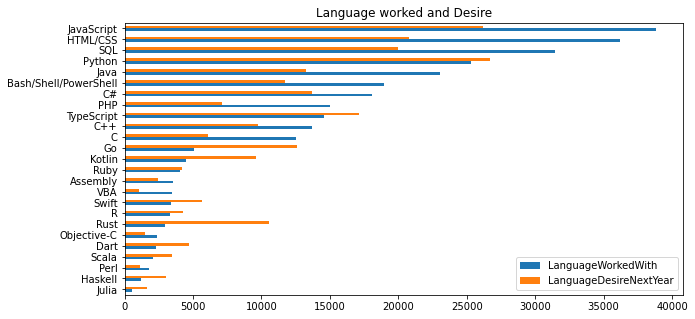

,LanguageWorkedWith,LanguageDesireNextYear,Be expected
Rust,2929,10563,7634
Go,5038,12605,7567
Kotlin,4468,9575,5107
TypeScript,14578,17150,2572
Dart,2280,4742,2462
Swift,3397,5643,2246
Haskell,1222,2996,1774
Scala,2052,3465,1413
Python,25287,26682,1395
Julia,519,1661,1142


In [11]:
comp_list=["LanguageWorkedWith","LanguageDesireNextYear"]
title="Language worked and Desire"
now_next(comp_list,title)

##  What is most popular platform ?
The cloud has become widespread and Linux has become the standard.Will Windows, which has been supporting our business for a long time, be chased?
Starting with Docker, which grew up on Linux, expectations for Kubernetes are high. It's the tide of new technology.  
There are many AWS users, but there are high expectations for Google Cloud, which is strong in AI. (This Notebook is also working on Google Cloud)  

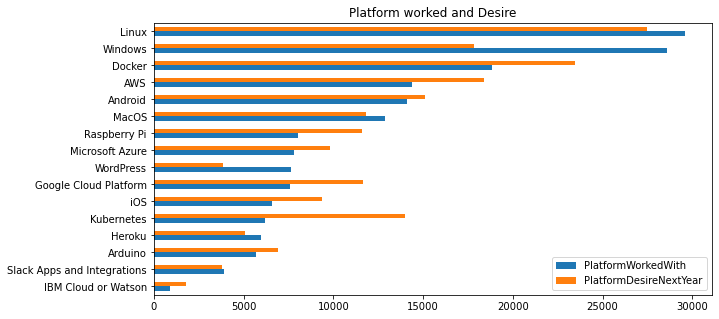

,PlatformWorkedWith,PlatformDesireNextYear,Be expected
Kubernetes,6178,14009,7831
Docker,18851,23458,4607
Google Cloud Platform,7569,11648,4079
AWS,14389,18381,3992
Raspberry Pi,8010,11614,3604
iOS,6562,9357,2795
Microsoft Azure,7830,9816,1986
Arduino,5712,6895,1183
Android,14101,15085,984
IBM Cloud or Watson,876,1813,937


In [12]:
comp_list=["PlatformWorkedWith","PlatformDesireNextYear"]
title="Platform worked and Desire"
now_next(comp_list,title)


## What is most popular Database ?
I'm not familiar with Databese. I know that MySQL and PostgreSQL are major. 
I recently learned about the power of the Columner database. This is Yandex's ClickHouse (https://clickhouse.tech/). Very lightweight and fast. It is indispensable for handling big data. There are various databases, each of which has its advantages and disadvantages. It's difficult to decide which database to choose.The columnar database Cassandra is also fast, isn't it? there are many technologies that Database does not know. let's study...

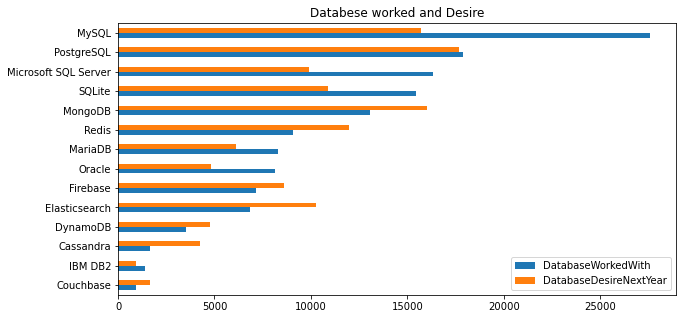

,DatabaseWorkedWith,DatabaseDesireNextYear,Be expected
Elasticsearch,6817,10269,3452
MongoDB,13086,16024,2938
Redis,9056,11977,2921
Cassandra,1654,4227,2573
Firebase,7128,8600,1472
DynamoDB,3497,4773,1276
Couchbase,937,1678,741
PostgreSQL,17892,17681,-211
IBM DB2,1421,935,-486
MariaDB,8312,6126,-2186


In [14]:
comp_list=["DatabaseWorkedWith","DatabaseDesireNextYear"]
title="Databese worked and Desire"
now_next(comp_list,title)


## What is most popular collaboration tool ?
Stack Overflow is growing fast. (Because it's a Stack Overflow survey) Github is no longer common sense.It may be the platform most frequently used by developers.

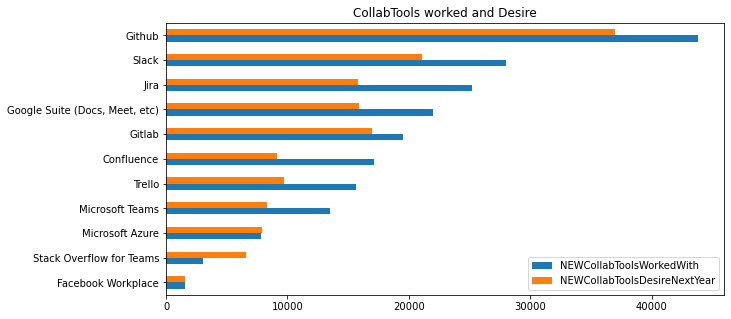

,NEWCollabToolsWorkedWith,NEWCollabToolsDesireNextYear,Be expected
Stack Overflow for Teams,3057,6557,3500
Microsoft Azure,7849,7877,28
Facebook Workplace,1580,1570,-10
Gitlab,19545,16974,-2571
Microsoft Teams,13518,8356,-5162
Trello,15655,9731,-5924
"Google Suite (Docs, Meet, etc)",21952,15909,-6043
Github,43786,36996,-6790
Slack,28018,21119,-6899
Confluence,17122,9153,-7969


In [15]:

comp_list=["NEWCollabToolsWorkedWith","NEWCollabToolsDesireNextYear"]
title="CollabTools worked and Desire"
now_next(comp_list,title)


## What is most popular  web framework ?
I'm not a web developer, so I'm not sure. This course (Udacity) deals with Flask, but there seems to be a technology that is drawing more attention.

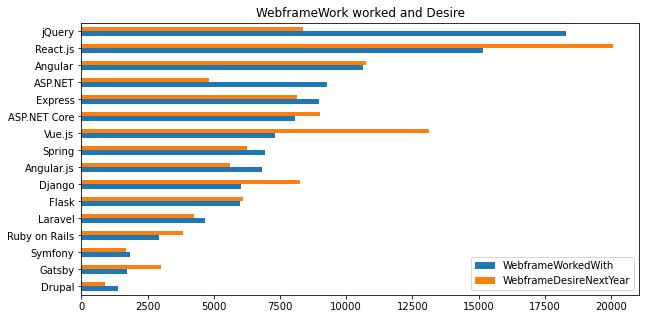

,WebframeWorkedWith,WebframeDesireNextYear,Be expected
Vue.js,7322,13142,5820
React.js,15167,20071,4904
Django,6014,8237,2223
Gatsby,1703,2998,1295
ASP.NET Core,8082,9018,936
Ruby on Rails,2944,3849,905
Angular,10617,10762,145
Flask,6005,6097,92
Symfony,1851,1692,-159
Laravel,4680,4260,-420


In [16]:
comp_list=["WebframeWorkedWith","WebframeDesireNextYear"]
title="WebframeWork worked and Desire"
now_next(comp_list,title)

## Other technologies  
TensorFlow is not popular as an AI framework, but I personally like Pytorch. Is Hadoop old when it comes to distributed infrastructure? Isn't Spark better? There are many technologies that I do not know. let's study..

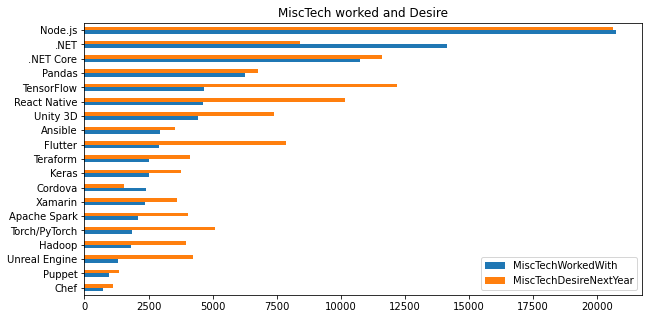

,MiscTechWorkedWith,MiscTechDesireNextYear,Be expected
TensorFlow,4652,12211,7559
React Native,4626,10175,5549
Flutter,2897,7881,4984
Torch/PyTorch,1872,5101,3229
Unity 3D,4413,7404,2991
Unreal Engine,1316,4249,2933
Hadoop,1798,3973,2175
Apache Spark,2089,4025,1936
Teraform,2518,4104,1586
Keras,2504,3749,1245


In [13]:
comp_list=["MiscTechWorkedWith","MiscTechDesireNextYear"]
title="MiscTech worked and Desire"
now_next(comp_list,title)

# What are the factors related to salary?


What is the income of developers around the world?
You can't be a developer just because you like technology. You also need money, right?

It's a bit old, but I'll use the information from the 2017 survey.
Let's explore the factors related to the salary of developers around the world.

In [5]:
#サラリーとの関係が深い

def clean_data(df,target,remove):
    '''
    INPUT
    df     -pandas dataframe
    target -Objective variable
    remove -remove variable
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no object variable
    2. Create X as all the columns that are not the object column
    3. Create y as the object column
    4. Drop the some columns related with object from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    
    print("Target:",target)
    
    df = df.dropna(subset=[target], axis=0)
    y = df[target]
    
    #Drop respondent and expected salary columns
    print("remove:",remove)
    df = df.drop(remove, axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        #df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        df = pd.concat([df.drop(var, axis=1), df[var].str.get_dummies(sep='; ').add_prefix(var+'_')], axis=1)
        
    X = df
    return X, y
    

In [6]:
df = pd.read_csv('./survey_results_public_2017.csv')
schema = pd.read_csv('./survey_results_schema_2017.csv')


In [7]:
#Use the function to create X and y
target='Salary'
remove=['Respondent', 'ExpectedSalary', 'Salary']


#target="ConvertedComp"
#remove=["ConvertedComp","CompTotal","CurrencySymbol","CurrencyDesc"]
#remove=['Respondent', 'Salary']
#target='CareerSatisfaction'
#remove=['JobSatisfaction','CareerSatisfaction']

X, y = clean_data(df,target,remove)    

import re
X=X.rename(columns=lambda x: re.sub(r"[^a-zA-Z0-9_]","",x))

Target: Salary
remove: ['Respondent', 'ExpectedSalary', 'Salary']


In [8]:
pd.set_option('display.max_columns', 10000)
X

CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
2                     8.0              9.0       2.64292   
14                    8.0              8.0       2.64292   
17                    9.0              8.0       2.64292   
18                    5.0              3.0       2.64292   
22                    8.0              9.0       2.64292   
...                   ...              ...           ...   
51371                 7.0              7.0       2.64292   
51378                10.0             10.0       2.64292   
51382                 9.0              5.0       0.00000   
51387                 7.0              3.0       5.00000   
51390                 6.0              7.0       1.00000   

       StackOverflowSatisfaction  Professional_Professionaldeveloper  \
2                       8.000000                                   1   
14                      8.000000                                   1   
17                      8.000000                                   1   
18                      8.511858                                   1   
22                      8.000000                                   1   
...                          ...                                 ...   
51371                   8.000000                                   1   
51378                  10.000000                                   1   
51382                   7.000000                                   1   
51387                   9.000000                                   1   
51390                   9.000000                                   1   

       ProgramHobby_No  ProgramHobby_YesIcontributetoopensourceprojects  \
2                    0                                                0   
14                   0                                                0   
17                   0                                                0   
18                   0                                                0   
22                   1                                                0   
...                ...                                              ...   
51371                1                                                0   
51378                0                                                1   
51382                0                                                0   
51387                0                                                0   
51390                0                                                0   

       ProgramHobby_YesIprogramasahobby  ProgramHobby_Yesboth  \
2                                     0                     1   
14                                    1                     0   
17                                    0                     1   
18                                    1                     0   
22                                    0                     0   
...                                 ...                   ...   
51371                                 0                     0   
51378                                 0                     0   
51382                                 1                     0   
51387                                 1                     0   
51390                                 1                     0   

       Country_Afghanistan  Country_Albania  Country_Anguilla  \
2                        0                0                 0   
14                       0                0                 0   
17                       0                0                 0   
18                       0                0                 0   
22                       0                0                 0   
...                    ...              ...               ...   
51371                    0                0                 0   
51378                    0                0                 0   
51382                    0                0                 0   
51387                    0                0                 0   
51390                   

In [125]:
y

2        113750.000000
14       100000.000000
17       130000.000000
18        82500.000000
22       100764.000000
             ...      
51371     74193.548387
51378    107526.881720
51382     32258.064516
51387     58000.000000
51390     40000.000000
Name: Salary, Length: 12891, dtype: float64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [122]:
dtrain = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test)

In [123]:
class TunerCVCheckpointCallback(object):

    def __init__(self):
        self.cv_boosters = {}

    @staticmethod
    def params_to_hash(params):
        params_hash = hash(frozenset(params.items()))
        return params_hash

    def get_trained_model(self, params):
        params_hash = self.params_to_hash(params)
        return self.cv_boosters[params_hash]

    def __call__(self, env):
        params_hash = self.params_to_hash(env.params)
        if params_hash not in self.cv_boosters:
            self.cv_boosters[params_hash] = env.model

In [129]:
import optuna.integration.lightgbm as lgb
disable_default_handler()


folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

checkpoint_cb = TunerCVCheckpointCallback()
callbacks = [checkpoint_cb]


param = {
        'objective': 'regression',
        #'objective': 'multiclass',
        'metric': 'rmse',
        'verbosity': 0,
        'boosting_type': 'gbdt',
    }

best = lgb.LightGBMTuner(param, 
                 dtrain,
                 valid_sets=eval_data,
                 early_stopping_rounds=100,
                 num_boost_round=1000,
                 #folds=folds,
                 #callbacks=callbacks,
                                           
                        )
best.run()





  0%|          | 0/7 [00:00<?, ?it/s]



feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[1]	valid_0's rmse: 36977.9
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34798.4
[3]	valid_0's rmse: 32973.4
[4]	valid_0's rmse: 31395.2
[5]	valid_0's rmse: 30019.4
[6]	valid_0's rmse: 28813.9
[7]	valid_0's rmse: 27766.2
[8]	valid_0's rmse: 26911.3
[9]	valid_0's rmse: 26173
[10]	valid_0's rmse: 25577.4
[11]	valid_0's rmse: 25146.8
[12]	valid_0's rmse: 24539.3
[13]	valid_0's rmse: 24097.4
[14]	valid_0's rmse: 23664.6
[15]	valid_0's rmse: 23286.5
[16]	valid_0's rmse: 22941.4
[17]	valid_0's rmse: 22675.1
[18]	valid_0's rmse: 22477
[19]	valid_0's rmse: 22255.3
[20]	valid_0's rmse: 21968.1
[21]	valid_0's rmse: 21796.7
[22]	valid_0's rmse: 21666.7
[23]	valid_0's rmse: 21565
[24]	valid_0's rmse: 21438.8
[25]	valid_0's rmse: 21272.9
[26]	valid_0's rmse: 21135.3
[27]	valid_0's rmse: 21013.6
[28]	valid_0's rmse: 20941.8
[29]	valid_0's rmse: 20857.7
[30]	valid_0's rmse: 20787.8
[31]	valid_0's rmse: 20659.2
[32]	valid_0's rmse: 20562.2
[33]	valid_0's rmse: 204





feature_fraction, val_score: 19002.344795:   0%|          | 0/7 [00:08<?, ?it/s]



feature_fraction, val_score: 19002.344795:  14%|#4        | 1/7 [00:08<00:50,  8.42s/it]



feature_fraction, val_score: 19002.344795:  14%|#4        | 1/7 [00:08<00:50,  8.42s/it]

[1]	valid_0's rmse: 37887.6
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 35813.3
[3]	valid_0's rmse: 34849.7
[4]	valid_0's rmse: 34021.7
[5]	valid_0's rmse: 32423.6
[6]	valid_0's rmse: 31151
[7]	valid_0's rmse: 30331.4
[8]	valid_0's rmse: 29016.4
[9]	valid_0's rmse: 28636
[10]	valid_0's rmse: 27715.6
[11]	valid_0's rmse: 27248.7
[12]	valid_0's rmse: 26809.1
[13]	valid_0's rmse: 26131.9
[14]	valid_0's rmse: 25412.2
[15]	valid_0's rmse: 24786
[16]	valid_0's rmse: 24515.7
[17]	valid_0's rmse: 24281.7
[18]	valid_0's rmse: 24039.9
[19]	valid_0's rmse: 23693.5
[20]	valid_0's rmse: 23507.9
[21]	valid_0's rmse: 23320.9
[22]	valid_0's rmse: 23030.2
[23]	valid_0's rmse: 22887.4
[24]	valid_0's rmse: 22637.1
[25]	valid_0's rmse: 22488.3
[26]	valid_0's rmse: 22264.1
[27]	valid_0's rmse: 22151.9
[28]	valid_0's rmse: 22063.2
[29]	valid_0's rmse: 21986.6
[30]	valid_0's rmse: 21818.9
[31]	valid_0's rmse: 21662.7
[32]	valid_0's rmse: 21554.8
[33]	valid_0's rmse: 214





feature_fraction, val_score: 19002.344795:  14%|#4        | 1/7 [00:15<00:50,  8.42s/it]



feature_fraction, val_score: 19002.344795:  29%|##8       | 2/7 [00:15<00:40,  8.08s/it]



feature_fraction, val_score: 19002.344795:  29%|##8       | 2/7 [00:15<00:40,  8.08s/it]

[1]	valid_0's rmse: 37035.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34961.1
[3]	valid_0's rmse: 33197.1
[4]	valid_0's rmse: 31521.2
[5]	valid_0's rmse: 30264.9
[6]	valid_0's rmse: 29091
[7]	valid_0's rmse: 28271.9
[8]	valid_0's rmse: 27260.2
[9]	valid_0's rmse: 26858.5
[10]	valid_0's rmse: 26128.2
[11]	valid_0's rmse: 25707.9
[12]	valid_0's rmse: 25252.4
[13]	valid_0's rmse: 24727.3
[14]	valid_0's rmse: 24209.2
[15]	valid_0's rmse: 23782
[16]	valid_0's rmse: 23429.9
[17]	valid_0's rmse: 23201.2
[18]	valid_0's rmse: 22851.6
[19]	valid_0's rmse: 22597
[20]	valid_0's rmse: 22321.6
[21]	valid_0's rmse: 22062.8
[22]	valid_0's rmse: 21856.6
[23]	valid_0's rmse: 21718.5
[24]	valid_0's rmse: 21581.5
[25]	valid_0's rmse: 21403
[26]	valid_0's rmse: 21273.7
[27]	valid_0's rmse: 21144.9
[28]	valid_0's rmse: 21026.9
[29]	valid_0's rmse: 20920.6
[30]	valid_0's rmse: 20804.9
[31]	valid_0's rmse: 20719.6
[32]	valid_0's rmse: 20676.5
[33]	valid_0's rmse: 20542





feature_fraction, val_score: 18908.310531:  29%|##8       | 2/7 [00:23<00:40,  8.08s/it]



feature_fraction, val_score: 18908.310531:  43%|####2     | 3/7 [00:23<00:32,  8.13s/it]



feature_fraction, val_score: 18908.310531:  43%|####2     | 3/7 [00:23<00:32,  8.13s/it]

[1]	valid_0's rmse: 36963.3
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34807.1
[3]	valid_0's rmse: 32971.3
[4]	valid_0's rmse: 31367
[5]	valid_0's rmse: 29927.3
[6]	valid_0's rmse: 28785.8
[7]	valid_0's rmse: 27766.4
[8]	valid_0's rmse: 26953.2
[9]	valid_0's rmse: 26244.2
[10]	valid_0's rmse: 25611.9
[11]	valid_0's rmse: 25055.7
[12]	valid_0's rmse: 24534.5
[13]	valid_0's rmse: 24083.4
[14]	valid_0's rmse: 23658.8
[15]	valid_0's rmse: 23322.5
[16]	valid_0's rmse: 22967.4
[17]	valid_0's rmse: 22613.2
[18]	valid_0's rmse: 22420.7
[19]	valid_0's rmse: 22199.2
[20]	valid_0's rmse: 22012.6
[21]	valid_0's rmse: 21802
[22]	valid_0's rmse: 21658.2
[23]	valid_0's rmse: 21549.1
[24]	valid_0's rmse: 21437.7
[25]	valid_0's rmse: 21277.9
[26]	valid_0's rmse: 21173.3
[27]	valid_0's rmse: 21080.2
[28]	valid_0's rmse: 20976
[29]	valid_0's rmse: 20837.8
[30]	valid_0's rmse: 20722.1
[31]	valid_0's rmse: 20654.6
[32]	valid_0's rmse: 20575.8
[33]	valid_0's rmse: 205





feature_fraction, val_score: 18908.310531:  43%|####2     | 3/7 [00:30<00:32,  8.13s/it]



feature_fraction, val_score: 18908.310531:  57%|#####7    | 4/7 [00:30<00:22,  7.58s/it]



feature_fraction, val_score: 18908.310531:  57%|#####7    | 4/7 [00:30<00:22,  7.58s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





feature_fraction, val_score: 18779.525940:  57%|#####7    | 4/7 [00:37<00:22,  7.58s/it]



feature_fraction, val_score: 18779.525940:  71%|#######1  | 5/7 [00:37<00:15,  7.56s/it]



feature_fraction, val_score: 18779.525940:  71%|#######1  | 5/7 [00:37<00:15,  7.56s/it]

[1]	valid_0's rmse: 37115
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 35057.3
[3]	valid_0's rmse: 33301.7
[4]	valid_0's rmse: 32373.6
[5]	valid_0's rmse: 31009.6
[6]	valid_0's rmse: 29802.2
[7]	valid_0's rmse: 28911.6
[8]	valid_0's rmse: 27834.2
[9]	valid_0's rmse: 27439.8
[10]	valid_0's rmse: 26666.3
[11]	valid_0's rmse: 26251.5
[12]	valid_0's rmse: 25804.5
[13]	valid_0's rmse: 25219.5
[14]	valid_0's rmse: 24629.9
[15]	valid_0's rmse: 24106.4
[16]	valid_0's rmse: 23863
[17]	valid_0's rmse: 23613.4
[18]	valid_0's rmse: 23284.1
[19]	valid_0's rmse: 23013.6
[20]	valid_0's rmse: 22704.2
[21]	valid_0's rmse: 22449.7
[22]	valid_0's rmse: 22221.9
[23]	valid_0's rmse: 22050.9
[24]	valid_0's rmse: 21850.4
[25]	valid_0's rmse: 21757.3
[26]	valid_0's rmse: 21578.2
[27]	valid_0's rmse: 21475.8
[28]	valid_0's rmse: 21369.3
[29]	valid_0's rmse: 21279.3
[30]	valid_0's rmse: 21113.7
[31]	valid_0's rmse: 20993.7
[32]	valid_0's rmse: 20913.6
[33]	valid_0's rmse: 2





feature_fraction, val_score: 18779.525940:  71%|#######1  | 5/7 [00:45<00:15,  7.56s/it]



feature_fraction, val_score: 18779.525940:  86%|########5 | 6/7 [00:45<00:07,  7.70s/it]



feature_fraction, val_score: 18779.525940:  86%|########5 | 6/7 [00:45<00:07,  7.70s/it]

[1]	valid_0's rmse: 36977.9
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34885.8
[3]	valid_0's rmse: 33122.8
[4]	valid_0's rmse: 31498.1
[5]	valid_0's rmse: 30206
[6]	valid_0's rmse: 28992.5
[7]	valid_0's rmse: 27914.3
[8]	valid_0's rmse: 27039.1
[9]	valid_0's rmse: 26242.5
[10]	valid_0's rmse: 25619.2
[11]	valid_0's rmse: 25212.5
[12]	valid_0's rmse: 24816.7
[13]	valid_0's rmse: 24329.9
[14]	valid_0's rmse: 23880.8
[15]	valid_0's rmse: 23505.4
[16]	valid_0's rmse: 23212.6
[17]	valid_0's rmse: 22971
[18]	valid_0's rmse: 22762.5
[19]	valid_0's rmse: 22540
[20]	valid_0's rmse: 22303.5
[21]	valid_0's rmse: 22114.7
[22]	valid_0's rmse: 21895.3
[23]	valid_0's rmse: 21740.2
[24]	valid_0's rmse: 21617.1
[25]	valid_0's rmse: 21444.3
[26]	valid_0's rmse: 21293.3
[27]	valid_0's rmse: 21168.4
[28]	valid_0's rmse: 21055.9
[29]	valid_0's rmse: 20972.6
[30]	valid_0's rmse: 20880.4
[31]	valid_0's rmse: 20745.7
[32]	valid_0's rmse: 20676.3
[33]	valid_0's rmse: 205





feature_fraction, val_score: 18779.525940:  86%|########5 | 6/7 [00:53<00:07,  7.70s/it]



feature_fraction, val_score: 18779.525940: 100%|##########| 7/7 [00:53<00:00,  7.61s/it]




  0%|          | 0/20 [00:00<?, ?it/s]



num_leaves, val_score: 18779.525940:   0%|          | 0/20 [00:00<?, ?it/s]

[1]	valid_0's rmse: 36851
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34595.4
[3]	valid_0's rmse: 32682.1
[4]	valid_0's rmse: 30997.8
[5]	valid_0's rmse: 29538.1
[6]	valid_0's rmse: 28299.3
[7]	valid_0's rmse: 27149.5
[8]	valid_0's rmse: 26202.9
[9]	valid_0's rmse: 25433.7
[10]	valid_0's rmse: 24794.1
[11]	valid_0's rmse: 24211.8
[12]	valid_0's rmse: 23756.8
[13]	valid_0's rmse: 23344.5
[14]	valid_0's rmse: 22863.8
[15]	valid_0's rmse: 22505.5
[16]	valid_0's rmse: 22180.6
[17]	valid_0's rmse: 21906.2
[18]	valid_0's rmse: 21699.6
[19]	valid_0's rmse: 21488.2
[20]	valid_0's rmse: 21284.7
[21]	valid_0's rmse: 21129.8
[22]	valid_0's rmse: 20946
[23]	valid_0's rmse: 20809.8
[24]	valid_0's rmse: 20691.5
[25]	valid_0's rmse: 20593.6
[26]	valid_0's rmse: 20482.2
[27]	valid_0's rmse: 20409.1
[28]	valid_0's rmse: 20323.9
[29]	valid_0's rmse: 20256.4
[30]	valid_0's rmse: 20199.9
[31]	valid_0's rmse: 20142.2
[32]	valid_0's rmse: 20095.1
[33]	valid_0's rmse: 2





num_leaves, val_score: 18779.525940:   0%|          | 0/20 [00:10<?, ?it/s]



num_leaves, val_score: 18779.525940:   5%|5         | 1/20 [00:10<03:10, 10.01s/it]



num_leaves, val_score: 18779.525940:   5%|5         | 1/20 [00:10<03:10, 10.01s/it]

[1]	valid_0's rmse: 36822
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34546.7
[3]	valid_0's rmse: 32580.5
[4]	valid_0's rmse: 30868.1
[5]	valid_0's rmse: 29390.2
[6]	valid_0's rmse: 28090.4
[7]	valid_0's rmse: 26974.5
[8]	valid_0's rmse: 26048.5
[9]	valid_0's rmse: 25219
[10]	valid_0's rmse: 24547.6
[11]	valid_0's rmse: 23989.2
[12]	valid_0's rmse: 23480.1
[13]	valid_0's rmse: 23078.7
[14]	valid_0's rmse: 22690
[15]	valid_0's rmse: 22366.7
[16]	valid_0's rmse: 21994.9
[17]	valid_0's rmse: 21751.7
[18]	valid_0's rmse: 21507.6
[19]	valid_0's rmse: 21310.6
[20]	valid_0's rmse: 21140.2
[21]	valid_0's rmse: 20974.3
[22]	valid_0's rmse: 20838.3
[23]	valid_0's rmse: 20740.3
[24]	valid_0's rmse: 20643.3
[25]	valid_0's rmse: 20549.5
[26]	valid_0's rmse: 20445.3
[27]	valid_0's rmse: 20348.2
[28]	valid_0's rmse: 20293.2
[29]	valid_0's rmse: 20188.9
[30]	valid_0's rmse: 20135.9
[31]	valid_0's rmse: 20054
[32]	valid_0's rmse: 20011.9
[33]	valid_0's rmse: 19964





num_leaves, val_score: 18779.525940:   5%|5         | 1/20 [00:20<03:10, 10.01s/it]



num_leaves, val_score: 18779.525940:  10%|#         | 2/20 [00:20<03:03, 10.20s/it]



num_leaves, val_score: 18779.525940:  10%|#         | 2/20 [00:20<03:03, 10.20s/it]

[1]	valid_0's rmse: 36855.2
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34603.7
[3]	valid_0's rmse: 32685.7
[4]	valid_0's rmse: 31013.8
[5]	valid_0's rmse: 29541.2
[6]	valid_0's rmse: 28301.4
[7]	valid_0's rmse: 27166.4
[8]	valid_0's rmse: 26230.5
[9]	valid_0's rmse: 25428.8
[10]	valid_0's rmse: 24784.8
[11]	valid_0's rmse: 24220
[12]	valid_0's rmse: 23729.5
[13]	valid_0's rmse: 23252.2
[14]	valid_0's rmse: 22864.1
[15]	valid_0's rmse: 22492.9
[16]	valid_0's rmse: 22187.4
[17]	valid_0's rmse: 21933.6
[18]	valid_0's rmse: 21697.8
[19]	valid_0's rmse: 21506.9
[20]	valid_0's rmse: 21282.9
[21]	valid_0's rmse: 21115.1
[22]	valid_0's rmse: 20992.4
[23]	valid_0's rmse: 20860.1
[24]	valid_0's rmse: 20678.5
[25]	valid_0's rmse: 20559.4
[26]	valid_0's rmse: 20451.1
[27]	valid_0's rmse: 20358.4
[28]	valid_0's rmse: 20283.2
[29]	valid_0's rmse: 20191.5
[30]	valid_0's rmse: 20093
[31]	valid_0's rmse: 20005.3
[32]	valid_0's rmse: 19954.6
[33]	valid_0's rmse: 1





num_leaves, val_score: 18779.525940:  10%|#         | 2/20 [00:29<03:03, 10.20s/it]



num_leaves, val_score: 18779.525940:  15%|#5        | 3/20 [00:29<02:46,  9.80s/it]



num_leaves, val_score: 18779.525940:  15%|#5        | 3/20 [00:29<02:46,  9.80s/it]

[1]	valid_0's rmse: 36783.2
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34455.8
[3]	valid_0's rmse: 32451.3
[4]	valid_0's rmse: 30723.8
[5]	valid_0's rmse: 29257.3
[6]	valid_0's rmse: 27938.9
[7]	valid_0's rmse: 26812.9
[8]	valid_0's rmse: 25830.3
[9]	valid_0's rmse: 25009
[10]	valid_0's rmse: 24316.5
[11]	valid_0's rmse: 23718.1
[12]	valid_0's rmse: 23213.1
[13]	valid_0's rmse: 22824.8
[14]	valid_0's rmse: 22454
[15]	valid_0's rmse: 22189.3
[16]	valid_0's rmse: 21917.9
[17]	valid_0's rmse: 21689.5
[18]	valid_0's rmse: 21483.3
[19]	valid_0's rmse: 21303.6
[20]	valid_0's rmse: 21114.4
[21]	valid_0's rmse: 20932.6
[22]	valid_0's rmse: 20799
[23]	valid_0's rmse: 20699.5
[24]	valid_0's rmse: 20564.7
[25]	valid_0's rmse: 20491.7
[26]	valid_0's rmse: 20426.3
[27]	valid_0's rmse: 20320
[28]	valid_0's rmse: 20275.6
[29]	valid_0's rmse: 20220.4
[30]	valid_0's rmse: 20160
[31]	valid_0's rmse: 20120.7
[32]	valid_0's rmse: 20082.7
[33]	valid_0's rmse: 20033.9





num_leaves, val_score: 18779.525940:  15%|#5        | 3/20 [00:44<02:46,  9.80s/it]



num_leaves, val_score: 18779.525940:  20%|##        | 4/20 [00:44<02:59, 11.24s/it]



num_leaves, val_score: 18779.525940:  20%|##        | 4/20 [00:44<02:59, 11.24s/it]

[1]	valid_0's rmse: 36781.2
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34448.5
[3]	valid_0's rmse: 32439
[4]	valid_0's rmse: 30703.2
[5]	valid_0's rmse: 29232.3
[6]	valid_0's rmse: 27905.9
[7]	valid_0's rmse: 26779.9
[8]	valid_0's rmse: 25774.2
[9]	valid_0's rmse: 24944.6
[10]	valid_0's rmse: 24265.2
[11]	valid_0's rmse: 23676.6
[12]	valid_0's rmse: 23173.8
[13]	valid_0's rmse: 22747.5
[14]	valid_0's rmse: 22370.5
[15]	valid_0's rmse: 22098.2
[16]	valid_0's rmse: 21855.2
[17]	valid_0's rmse: 21636.6
[18]	valid_0's rmse: 21413
[19]	valid_0's rmse: 21246.1
[20]	valid_0's rmse: 21065.6
[21]	valid_0's rmse: 20941.5
[22]	valid_0's rmse: 20779.4
[23]	valid_0's rmse: 20671
[24]	valid_0's rmse: 20551.7
[25]	valid_0's rmse: 20464.3
[26]	valid_0's rmse: 20380.7
[27]	valid_0's rmse: 20298.8
[28]	valid_0's rmse: 20253.6
[29]	valid_0's rmse: 20195.5
[30]	valid_0's rmse: 20152.9
[31]	valid_0's rmse: 20129
[32]	valid_0's rmse: 20093.3
[33]	valid_0's rmse: 20066





num_leaves, val_score: 18779.525940:  20%|##        | 4/20 [00:57<02:59, 11.24s/it]



num_leaves, val_score: 18779.525940:  25%|##5       | 5/20 [00:57<02:57, 11.85s/it]



num_leaves, val_score: 18779.525940:  25%|##5       | 5/20 [00:57<02:57, 11.85s/it]

[1]	valid_0's rmse: 37370.8
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 35603
[3]	valid_0's rmse: 34093.1
[4]	valid_0's rmse: 32814.9
[5]	valid_0's rmse: 31731.2
[6]	valid_0's rmse: 30827.4
[7]	valid_0's rmse: 30033.9
[8]	valid_0's rmse: 29374.6
[9]	valid_0's rmse: 28765.5
[10]	valid_0's rmse: 28249
[11]	valid_0's rmse: 27804.9
[12]	valid_0's rmse: 27389.6
[13]	valid_0's rmse: 27045.4
[14]	valid_0's rmse: 26760.2
[15]	valid_0's rmse: 26476
[16]	valid_0's rmse: 26213.8
[17]	valid_0's rmse: 25993.2
[18]	valid_0's rmse: 25748.8
[19]	valid_0's rmse: 25569.9
[20]	valid_0's rmse: 25395
[21]	valid_0's rmse: 25214.9
[22]	valid_0's rmse: 25050.4
[23]	valid_0's rmse: 24879.9
[24]	valid_0's rmse: 24719.8
[25]	valid_0's rmse: 24585.5
[26]	valid_0's rmse: 24469.1
[27]	valid_0's rmse: 24236.8
[28]	valid_0's rmse: 24134.7
[29]	valid_0's rmse: 24030.5
[30]	valid_0's rmse: 23916.9
[31]	valid_0's rmse: 23808
[32]	valid_0's rmse: 23643.4
[33]	valid_0's rmse: 23541.4





num_leaves, val_score: 18779.525940:  25%|##5       | 5/20 [01:07<02:57, 11.85s/it]



num_leaves, val_score: 18779.525940:  30%|###       | 6/20 [01:07<02:39, 11.37s/it]



num_leaves, val_score: 18779.525940:  30%|###       | 6/20 [01:07<02:39, 11.37s/it]

[1]	valid_0's rmse: 36787.6
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34494.8
[3]	valid_0's rmse: 32503.3
[4]	valid_0's rmse: 30781.6
[5]	valid_0's rmse: 29317.6
[6]	valid_0's rmse: 28002.4
[7]	valid_0's rmse: 26883.7
[8]	valid_0's rmse: 25869.1
[9]	valid_0's rmse: 25053.7
[10]	valid_0's rmse: 24367.3
[11]	valid_0's rmse: 23846.1
[12]	valid_0's rmse: 23357.7
[13]	valid_0's rmse: 22929.6
[14]	valid_0's rmse: 22560.5
[15]	valid_0's rmse: 22258.3
[16]	valid_0's rmse: 21998.7
[17]	valid_0's rmse: 21735.4
[18]	valid_0's rmse: 21524
[19]	valid_0's rmse: 21324.8
[20]	valid_0's rmse: 21152.6
[21]	valid_0's rmse: 20960.5
[22]	valid_0's rmse: 20798.7
[23]	valid_0's rmse: 20726.4
[24]	valid_0's rmse: 20607.9
[25]	valid_0's rmse: 20512.3
[26]	valid_0's rmse: 20435.6
[27]	valid_0's rmse: 20352.1
[28]	valid_0's rmse: 20254.7
[29]	valid_0's rmse: 20187.3
[30]	valid_0's rmse: 20117.3
[31]	valid_0's rmse: 20068.8
[32]	valid_0's rmse: 20046.7
[33]	valid_0's rmse:





num_leaves, val_score: 18779.525940:  30%|###       | 6/20 [01:20<02:39, 11.37s/it]



num_leaves, val_score: 18779.525940:  35%|###5      | 7/20 [01:20<02:34, 11.85s/it]



num_leaves, val_score: 18779.525940:  35%|###5      | 7/20 [01:20<02:34, 11.85s/it]

[1]	valid_0's rmse: 37265.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 35404.9
[3]	valid_0's rmse: 33814.2
[4]	valid_0's rmse: 32468.1
[5]	valid_0's rmse: 31315.5
[6]	valid_0's rmse: 30315.1
[7]	valid_0's rmse: 29467.7
[8]	valid_0's rmse: 28720.3
[9]	valid_0's rmse: 28100.5
[10]	valid_0's rmse: 27570.7
[11]	valid_0's rmse: 26998.3
[12]	valid_0's rmse: 26516.7
[13]	valid_0's rmse: 26122.6
[14]	valid_0's rmse: 25800.8
[15]	valid_0's rmse: 25506.6
[16]	valid_0's rmse: 25224.9
[17]	valid_0's rmse: 24980.8
[18]	valid_0's rmse: 24769.1
[19]	valid_0's rmse: 24518.8
[20]	valid_0's rmse: 24344.6
[21]	valid_0's rmse: 24175.6
[22]	valid_0's rmse: 24007.9
[23]	valid_0's rmse: 23795.8
[24]	valid_0's rmse: 23644.2
[25]	valid_0's rmse: 23512.6
[26]	valid_0's rmse: 23366.5
[27]	valid_0's rmse: 23182.5
[28]	valid_0's rmse: 23067.7
[29]	valid_0's rmse: 22955.9
[30]	valid_0's rmse: 22843.6
[31]	valid_0's rmse: 22768.5
[32]	valid_0's rmse: 22611.8
[33]	valid_0's rms





num_leaves, val_score: 18779.525940:  35%|###5      | 7/20 [01:29<02:34, 11.85s/it]



num_leaves, val_score: 18779.525940:  40%|####      | 8/20 [01:29<02:10, 10.87s/it]



num_leaves, val_score: 18779.525940:  40%|####      | 8/20 [01:29<02:10, 10.87s/it]

[1]	valid_0's rmse: 36787.4
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34496.6
[3]	valid_0's rmse: 32508.5
[4]	valid_0's rmse: 30792.6
[5]	valid_0's rmse: 29329.1
[6]	valid_0's rmse: 28005.7
[7]	valid_0's rmse: 26883.9
[8]	valid_0's rmse: 25898.7
[9]	valid_0's rmse: 25076.6
[10]	valid_0's rmse: 24403.5
[11]	valid_0's rmse: 23836.8
[12]	valid_0's rmse: 23362.7
[13]	valid_0's rmse: 22950.7
[14]	valid_0's rmse: 22576.5
[15]	valid_0's rmse: 22279
[16]	valid_0's rmse: 22044
[17]	valid_0's rmse: 21796.9
[18]	valid_0's rmse: 21601.2
[19]	valid_0's rmse: 21392.5
[20]	valid_0's rmse: 21209.2
[21]	valid_0's rmse: 21018.3
[22]	valid_0's rmse: 20838
[23]	valid_0's rmse: 20727.9
[24]	valid_0's rmse: 20600.8
[25]	valid_0's rmse: 20510.1
[26]	valid_0's rmse: 20407.3
[27]	valid_0's rmse: 20337.6
[28]	valid_0's rmse: 20275.3
[29]	valid_0's rmse: 20207.6
[30]	valid_0's rmse: 20146.6
[31]	valid_0's rmse: 20093.7
[32]	valid_0's rmse: 20050.8
[33]	valid_0's rmse: 199





num_leaves, val_score: 18779.525940:  40%|####      | 8/20 [01:41<02:10, 10.87s/it]



num_leaves, val_score: 18779.525940:  45%|####5     | 9/20 [01:41<02:05, 11.39s/it]



num_leaves, val_score: 18779.525940:  45%|####5     | 9/20 [01:41<02:05, 11.39s/it]

[1]	valid_0's rmse: 36790.2
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34506.1
[3]	valid_0's rmse: 32505.6
[4]	valid_0's rmse: 30791
[5]	valid_0's rmse: 29314.5
[6]	valid_0's rmse: 28045.8
[7]	valid_0's rmse: 26938.2
[8]	valid_0's rmse: 25951
[9]	valid_0's rmse: 25115.8
[10]	valid_0's rmse: 24417.1
[11]	valid_0's rmse: 23852.9
[12]	valid_0's rmse: 23374.4
[13]	valid_0's rmse: 22952.4
[14]	valid_0's rmse: 22622.7
[15]	valid_0's rmse: 22277.1
[16]	valid_0's rmse: 22002.3
[17]	valid_0's rmse: 21764.8
[18]	valid_0's rmse: 21515
[19]	valid_0's rmse: 21333.3
[20]	valid_0's rmse: 21157.2
[21]	valid_0's rmse: 20984.3
[22]	valid_0's rmse: 20846.2
[23]	valid_0's rmse: 20723
[24]	valid_0's rmse: 20612.3
[25]	valid_0's rmse: 20486.6
[26]	valid_0's rmse: 20399.8
[27]	valid_0's rmse: 20293.6
[28]	valid_0's rmse: 20232.8
[29]	valid_0's rmse: 20147.7
[30]	valid_0's rmse: 20081.8
[31]	valid_0's rmse: 20046.6
[32]	valid_0's rmse: 19998.3
[33]	valid_0's rmse: 19950





num_leaves, val_score: 18779.525940:  45%|####5     | 9/20 [01:53<02:05, 11.39s/it]



num_leaves, val_score: 18779.525940:  50%|#####     | 10/20 [01:53<01:56, 11.60s/it]



num_leaves, val_score: 18779.525940:  50%|#####     | 10/20 [01:53<01:56, 11.60s/it]

[1]	valid_0's rmse: 36903.8
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34673.8
[3]	valid_0's rmse: 32769.3
[4]	valid_0's rmse: 31122.9
[5]	valid_0's rmse: 29737.2
[6]	valid_0's rmse: 28506
[7]	valid_0's rmse: 27415.4
[8]	valid_0's rmse: 26485.7
[9]	valid_0's rmse: 25694.9
[10]	valid_0's rmse: 25081.6
[11]	valid_0's rmse: 24532.9
[12]	valid_0's rmse: 24026.4
[13]	valid_0's rmse: 23616.4
[14]	valid_0's rmse: 23226.2
[15]	valid_0's rmse: 22808.5
[16]	valid_0's rmse: 22443.1
[17]	valid_0's rmse: 22176.4
[18]	valid_0's rmse: 21983.4
[19]	valid_0's rmse: 21780.3
[20]	valid_0's rmse: 21589.1
[21]	valid_0's rmse: 21430.8
[22]	valid_0's rmse: 21319
[23]	valid_0's rmse: 21155.4
[24]	valid_0's rmse: 20972.8
[25]	valid_0's rmse: 20856.2
[26]	valid_0's rmse: 20737.6
[27]	valid_0's rmse: 20642.8
[28]	valid_0's rmse: 20571
[29]	valid_0's rmse: 20504.9
[30]	valid_0's rmse: 20441.6
[31]	valid_0's rmse: 20397
[32]	valid_0's rmse: 20353.3
[33]	valid_0's rmse: 20283





num_leaves, val_score: 18779.525940:  50%|#####     | 10/20 [02:01<01:56, 11.60s/it]



num_leaves, val_score: 18779.525940:  55%|#####5    | 11/20 [02:01<01:32, 10.30s/it]



num_leaves, val_score: 18779.525940:  55%|#####5    | 11/20 [02:01<01:32, 10.30s/it]

[1]	valid_0's rmse: 36800.8
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34514.3
[3]	valid_0's rmse: 32537.5
[4]	valid_0's rmse: 30842.7
[5]	valid_0's rmse: 29353.6
[6]	valid_0's rmse: 28114.8
[7]	valid_0's rmse: 27005
[8]	valid_0's rmse: 26003.2
[9]	valid_0's rmse: 25168.2
[10]	valid_0's rmse: 24478.6
[11]	valid_0's rmse: 23907.9
[12]	valid_0's rmse: 23454.7
[13]	valid_0's rmse: 23002.5
[14]	valid_0's rmse: 22637
[15]	valid_0's rmse: 22308.9
[16]	valid_0's rmse: 22017.4
[17]	valid_0's rmse: 21740.1
[18]	valid_0's rmse: 21515.9
[19]	valid_0's rmse: 21295.8
[20]	valid_0's rmse: 21104.2
[21]	valid_0's rmse: 21010.1
[22]	valid_0's rmse: 20887.8
[23]	valid_0's rmse: 20779
[24]	valid_0's rmse: 20633
[25]	valid_0's rmse: 20520.5
[26]	valid_0's rmse: 20464.8
[27]	valid_0's rmse: 20365.9
[28]	valid_0's rmse: 20287.8
[29]	valid_0's rmse: 20197.2
[30]	valid_0's rmse: 20127.5
[31]	valid_0's rmse: 20077.3
[32]	valid_0's rmse: 20033.3
[33]	valid_0's rmse: 20009





num_leaves, val_score: 18779.525940:  55%|#####5    | 11/20 [02:17<01:32, 10.30s/it]



num_leaves, val_score: 18779.525940:  60%|######    | 12/20 [02:17<01:37, 12.15s/it]



num_leaves, val_score: 18779.525940:  60%|######    | 12/20 [02:17<01:37, 12.15s/it]

[1]	valid_0's rmse: 36784.2
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34460.9
[3]	valid_0's rmse: 32447.7
[4]	valid_0's rmse: 30726.2
[5]	valid_0's rmse: 29270.1
[6]	valid_0's rmse: 27955.9
[7]	valid_0's rmse: 26863.8
[8]	valid_0's rmse: 25865.9
[9]	valid_0's rmse: 25041.2
[10]	valid_0's rmse: 24382.1
[11]	valid_0's rmse: 23751
[12]	valid_0's rmse: 23241.6
[13]	valid_0's rmse: 22827
[14]	valid_0's rmse: 22503.9
[15]	valid_0's rmse: 22217.6
[16]	valid_0's rmse: 21968.1
[17]	valid_0's rmse: 21727.4
[18]	valid_0's rmse: 21513.6
[19]	valid_0's rmse: 21322.5
[20]	valid_0's rmse: 21137.5
[21]	valid_0's rmse: 20939
[22]	valid_0's rmse: 20788.6
[23]	valid_0's rmse: 20672.7
[24]	valid_0's rmse: 20553.4
[25]	valid_0's rmse: 20465.1
[26]	valid_0's rmse: 20384.2
[27]	valid_0's rmse: 20291.6
[28]	valid_0's rmse: 20245.7
[29]	valid_0's rmse: 20175.3
[30]	valid_0's rmse: 20109.9
[31]	valid_0's rmse: 20042.7
[32]	valid_0's rmse: 19989.1
[33]	valid_0's rmse: 199





num_leaves, val_score: 18779.525940:  60%|######    | 12/20 [02:32<01:37, 12.15s/it]



num_leaves, val_score: 18779.525940:  65%|######5   | 13/20 [02:32<01:30, 12.97s/it]



num_leaves, val_score: 18779.525940:  65%|######5   | 13/20 [02:32<01:30, 12.97s/it]

[1]	valid_0's rmse: 36807.8
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34539.1
[3]	valid_0's rmse: 32560.2
[4]	valid_0's rmse: 30849.6
[5]	valid_0's rmse: 29383.7
[6]	valid_0's rmse: 28092.8
[7]	valid_0's rmse: 26980
[8]	valid_0's rmse: 25993.9
[9]	valid_0's rmse: 25157.8
[10]	valid_0's rmse: 24444.4
[11]	valid_0's rmse: 23877.5
[12]	valid_0's rmse: 23375.1
[13]	valid_0's rmse: 22970.2
[14]	valid_0's rmse: 22613
[15]	valid_0's rmse: 22264.9
[16]	valid_0's rmse: 22011.8
[17]	valid_0's rmse: 21745
[18]	valid_0's rmse: 21482
[19]	valid_0's rmse: 21285.9
[20]	valid_0's rmse: 21089.1
[21]	valid_0's rmse: 20946
[22]	valid_0's rmse: 20827.6
[23]	valid_0's rmse: 20709.2
[24]	valid_0's rmse: 20590.6
[25]	valid_0's rmse: 20461.9
[26]	valid_0's rmse: 20331.2
[27]	valid_0's rmse: 20261.3
[28]	valid_0's rmse: 20182.6
[29]	valid_0's rmse: 20138.1
[30]	valid_0's rmse: 20065.2
[31]	valid_0's rmse: 19999.9
[32]	valid_0's rmse: 19954.3
[33]	valid_0's rmse: 19912.4





num_leaves, val_score: 18779.525940:  65%|######5   | 13/20 [02:42<01:30, 12.97s/it]



num_leaves, val_score: 18779.525940:  70%|#######   | 14/20 [02:42<01:12, 12.12s/it]



num_leaves, val_score: 18779.525940:  70%|#######   | 14/20 [02:42<01:12, 12.12s/it]

[1]	valid_0's rmse: 36917.6
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34706.3
[3]	valid_0's rmse: 32829.8
[4]	valid_0's rmse: 31221.8
[5]	valid_0's rmse: 29839.6
[6]	valid_0's rmse: 28617.9
[7]	valid_0's rmse: 27629.2
[8]	valid_0's rmse: 26721.3
[9]	valid_0's rmse: 25949.6
[10]	valid_0's rmse: 25315.3
[11]	valid_0's rmse: 24748.4
[12]	valid_0's rmse: 24229.6
[13]	valid_0's rmse: 23721.1
[14]	valid_0's rmse: 23328.9
[15]	valid_0's rmse: 22969.3
[16]	valid_0's rmse: 22615.9
[17]	valid_0's rmse: 22362.6
[18]	valid_0's rmse: 22144.7
[19]	valid_0's rmse: 21944.5
[20]	valid_0's rmse: 21767.2
[21]	valid_0's rmse: 21609.4
[22]	valid_0's rmse: 21403.5
[23]	valid_0's rmse: 21280.3
[24]	valid_0's rmse: 21111.8
[25]	valid_0's rmse: 20966.2
[26]	valid_0's rmse: 20882.8
[27]	valid_0's rmse: 20794.8
[28]	valid_0's rmse: 20706.5
[29]	valid_0's rmse: 20560.4
[30]	valid_0's rmse: 20481.5
[31]	valid_0's rmse: 20414.7
[32]	valid_0's rmse: 20344.8
[33]	valid_0's rms





num_leaves, val_score: 18779.525940:  70%|#######   | 14/20 [02:49<01:12, 12.12s/it]



num_leaves, val_score: 18779.525940:  75%|#######5  | 15/20 [02:49<00:52, 10.56s/it]



num_leaves, val_score: 18779.525940:  75%|#######5  | 15/20 [02:49<00:52, 10.56s/it]

[1]	valid_0's rmse: 36783.3
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34458
[3]	valid_0's rmse: 32453.4
[4]	valid_0's rmse: 30741
[5]	valid_0's rmse: 29273.1
[6]	valid_0's rmse: 27966
[7]	valid_0's rmse: 26841.9
[8]	valid_0's rmse: 25840.3
[9]	valid_0's rmse: 24989.6
[10]	valid_0's rmse: 24331.9
[11]	valid_0's rmse: 23737.7
[12]	valid_0's rmse: 23253.2
[13]	valid_0's rmse: 22842
[14]	valid_0's rmse: 22496.7
[15]	valid_0's rmse: 22220
[16]	valid_0's rmse: 21961.4
[17]	valid_0's rmse: 21700.6
[18]	valid_0's rmse: 21487.1
[19]	valid_0's rmse: 21260.4
[20]	valid_0's rmse: 21088.2
[21]	valid_0's rmse: 20967.6
[22]	valid_0's rmse: 20836.8
[23]	valid_0's rmse: 20709.1
[24]	valid_0's rmse: 20586.2
[25]	valid_0's rmse: 20513.1
[26]	valid_0's rmse: 20447.4
[27]	valid_0's rmse: 20353.3
[28]	valid_0's rmse: 20298.5
[29]	valid_0's rmse: 20234.9
[30]	valid_0's rmse: 20173.2
[31]	valid_0's rmse: 20112.5
[32]	valid_0's rmse: 20057.5
[33]	valid_0's rmse: 20004.1





num_leaves, val_score: 18779.525940:  75%|#######5  | 15/20 [02:59<00:52, 10.56s/it]



num_leaves, val_score: 18779.525940:  80%|########  | 16/20 [02:59<00:41, 10.46s/it]



num_leaves, val_score: 18779.525940:  80%|########  | 16/20 [02:59<00:41, 10.46s/it]

[1]	valid_0's rmse: 36800.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34518.5
[3]	valid_0's rmse: 32542.6
[4]	valid_0's rmse: 30845.2
[5]	valid_0's rmse: 29357.1
[6]	valid_0's rmse: 28110.9
[7]	valid_0's rmse: 26978.9
[8]	valid_0's rmse: 25975
[9]	valid_0's rmse: 25114.9
[10]	valid_0's rmse: 24419.3
[11]	valid_0's rmse: 23863.1
[12]	valid_0's rmse: 23376.2
[13]	valid_0's rmse: 22991.1
[14]	valid_0's rmse: 22601.9
[15]	valid_0's rmse: 22275.4
[16]	valid_0's rmse: 21974.7
[17]	valid_0's rmse: 21726.7
[18]	valid_0's rmse: 21519.1
[19]	valid_0's rmse: 21276.8
[20]	valid_0's rmse: 21102.2
[21]	valid_0's rmse: 20976.3
[22]	valid_0's rmse: 20809.9
[23]	valid_0's rmse: 20686.6
[24]	valid_0's rmse: 20555.8
[25]	valid_0's rmse: 20452.2
[26]	valid_0's rmse: 20366.8
[27]	valid_0's rmse: 20299.7
[28]	valid_0's rmse: 20250.3
[29]	valid_0's rmse: 20183.2
[30]	valid_0's rmse: 20123.8
[31]	valid_0's rmse: 20068.3
[32]	valid_0's rmse: 20013.2
[33]	valid_0's rmse:





num_leaves, val_score: 18779.525940:  80%|########  | 16/20 [03:14<00:41, 10.46s/it]



num_leaves, val_score: 18779.525940:  85%|########5 | 17/20 [03:14<00:35, 11.78s/it]



num_leaves, val_score: 18779.525940:  85%|########5 | 17/20 [03:14<00:35, 11.78s/it]

[1]	valid_0's rmse: 36971.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34805.1
[3]	valid_0's rmse: 33005.1
[4]	valid_0's rmse: 31471.2
[5]	valid_0's rmse: 30148.6
[6]	valid_0's rmse: 28960.2
[7]	valid_0's rmse: 27981.6
[8]	valid_0's rmse: 27140.6
[9]	valid_0's rmse: 26376.6
[10]	valid_0's rmse: 25790.3
[11]	valid_0's rmse: 25219.4
[12]	valid_0's rmse: 24699.5
[13]	valid_0's rmse: 24252.1
[14]	valid_0's rmse: 23851.9
[15]	valid_0's rmse: 23431.7
[16]	valid_0's rmse: 23140.8
[17]	valid_0's rmse: 22875.3
[18]	valid_0's rmse: 22641.6
[19]	valid_0's rmse: 22414.3
[20]	valid_0's rmse: 22119.8
[21]	valid_0's rmse: 21952.9
[22]	valid_0's rmse: 21812.5
[23]	valid_0's rmse: 21684.4
[24]	valid_0's rmse: 21565.6
[25]	valid_0's rmse: 21394.4
[26]	valid_0's rmse: 21292.9
[27]	valid_0's rmse: 21166.7
[28]	valid_0's rmse: 21073.9
[29]	valid_0's rmse: 20978.4
[30]	valid_0's rmse: 20861.2
[31]	valid_0's rmse: 20803.8
[32]	valid_0's rmse: 20716.6
[33]	valid_0's rms





num_leaves, val_score: 18779.525940:  85%|########5 | 17/20 [03:19<00:35, 11.78s/it]



num_leaves, val_score: 18779.525940:  90%|######### | 18/20 [03:19<00:19,  9.79s/it]



num_leaves, val_score: 18779.525940:  90%|######### | 18/20 [03:19<00:19,  9.79s/it]

[1]	valid_0's rmse: 36843.6
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34581.8
[3]	valid_0's rmse: 32650.4
[4]	valid_0's rmse: 30963
[5]	valid_0's rmse: 29514
[6]	valid_0's rmse: 28259.7
[7]	valid_0's rmse: 27110.5
[8]	valid_0's rmse: 26196.1
[9]	valid_0's rmse: 25391.1
[10]	valid_0's rmse: 24730.2
[11]	valid_0's rmse: 24123.4
[12]	valid_0's rmse: 23649.9
[13]	valid_0's rmse: 23252.2
[14]	valid_0's rmse: 22796
[15]	valid_0's rmse: 22432.9
[16]	valid_0's rmse: 22124.5
[17]	valid_0's rmse: 21838.3
[18]	valid_0's rmse: 21622.2
[19]	valid_0's rmse: 21437.9
[20]	valid_0's rmse: 21198
[21]	valid_0's rmse: 21023.8
[22]	valid_0's rmse: 20849.6
[23]	valid_0's rmse: 20743.7
[24]	valid_0's rmse: 20618.1
[25]	valid_0's rmse: 20531.6
[26]	valid_0's rmse: 20398.9
[27]	valid_0's rmse: 20336.5
[28]	valid_0's rmse: 20265.4
[29]	valid_0's rmse: 20195.6
[30]	valid_0's rmse: 20127.4
[31]	valid_0's rmse: 20029.4
[32]	valid_0's rmse: 19954.6
[33]	valid_0's rmse: 19899





num_leaves, val_score: 18779.525940:  90%|######### | 18/20 [03:27<00:19,  9.79s/it]



num_leaves, val_score: 18779.525940:  95%|#########5| 19/20 [03:27<00:09,  9.13s/it]



num_leaves, val_score: 18779.525940:  95%|#########5| 19/20 [03:27<00:09,  9.13s/it]

[1]	valid_0's rmse: 36794
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34509.4
[3]	valid_0's rmse: 32529.8
[4]	valid_0's rmse: 30822.7
[5]	valid_0's rmse: 29335.3
[6]	valid_0's rmse: 28023.4
[7]	valid_0's rmse: 26888.3
[8]	valid_0's rmse: 25896.2
[9]	valid_0's rmse: 25084.7
[10]	valid_0's rmse: 24414.5
[11]	valid_0's rmse: 23821.9
[12]	valid_0's rmse: 23362.3
[13]	valid_0's rmse: 22960.7
[14]	valid_0's rmse: 22615.7
[15]	valid_0's rmse: 22290.7
[16]	valid_0's rmse: 22018.3
[17]	valid_0's rmse: 21779.1
[18]	valid_0's rmse: 21565.2
[19]	valid_0's rmse: 21366.6
[20]	valid_0's rmse: 21140.4
[21]	valid_0's rmse: 20976.3
[22]	valid_0's rmse: 20881.7
[23]	valid_0's rmse: 20766.8
[24]	valid_0's rmse: 20623.8
[25]	valid_0's rmse: 20509
[26]	valid_0's rmse: 20413.7
[27]	valid_0's rmse: 20325.8
[28]	valid_0's rmse: 20252.7
[29]	valid_0's rmse: 20205.6
[30]	valid_0's rmse: 20133
[31]	valid_0's rmse: 20080.8
[32]	valid_0's rmse: 20032.6
[33]	valid_0's rmse: 199





num_leaves, val_score: 18779.525940:  95%|#########5| 19/20 [03:40<00:09,  9.13s/it]



num_leaves, val_score: 18779.525940: 100%|##########| 20/20 [03:40<00:00, 11.01s/it]




  0%|          | 0/10 [00:00<?, ?it/s]



bagging, val_score: 18779.525940:   0%|          | 0/10 [00:00<?, ?it/s]

[1]	valid_0's rmse: 36960.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34786.5
[3]	valid_0's rmse: 32968.3
[4]	valid_0's rmse: 31384.7
[5]	valid_0's rmse: 30044.3
[6]	valid_0's rmse: 28858.6
[7]	valid_0's rmse: 27851.5
[8]	valid_0's rmse: 27002.2
[9]	valid_0's rmse: 26199.8
[10]	valid_0's rmse: 25560.6
[11]	valid_0's rmse: 25008.1
[12]	valid_0's rmse: 24501.2
[13]	valid_0's rmse: 24054.7
[14]	valid_0's rmse: 23679.8
[15]	valid_0's rmse: 23299.4
[16]	valid_0's rmse: 23007.8
[17]	valid_0's rmse: 22747.4
[18]	valid_0's rmse: 22496.4
[19]	valid_0's rmse: 22254.4
[20]	valid_0's rmse: 22061.1
[21]	valid_0's rmse: 21869.1
[22]	valid_0's rmse: 21728.4
[23]	valid_0's rmse: 21574.1
[24]	valid_0's rmse: 21448.9
[25]	valid_0's rmse: 21286.2
[26]	valid_0's rmse: 21160.6
[27]	valid_0's rmse: 21020.7
[28]	valid_0's rmse: 20927.2
[29]	valid_0's rmse: 20847.5
[30]	valid_0's rmse: 20710.3
[31]	valid_0's rmse: 20645.8
[32]	valid_0's rmse: 20562.8
[33]	valid_0's rms





bagging, val_score: 18779.525940:   0%|          | 0/10 [00:05<?, ?it/s]



bagging, val_score: 18779.525940:  10%|#         | 1/10 [00:05<00:53,  5.95s/it]



bagging, val_score: 18779.525940:  10%|#         | 1/10 [00:05<00:53,  5.95s/it]

[1]	valid_0's rmse: 37025.9
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34946.9
[3]	valid_0's rmse: 33154.3
[4]	valid_0's rmse: 31570.8
[5]	valid_0's rmse: 30197.4
[6]	valid_0's rmse: 28982.2
[7]	valid_0's rmse: 27951
[8]	valid_0's rmse: 27102.1
[9]	valid_0's rmse: 26319.3
[10]	valid_0's rmse: 25642.5
[11]	valid_0's rmse: 24952
[12]	valid_0's rmse: 24497.5
[13]	valid_0's rmse: 23992.4
[14]	valid_0's rmse: 23624.9
[15]	valid_0's rmse: 23339.7
[16]	valid_0's rmse: 23044.2
[17]	valid_0's rmse: 22738.4
[18]	valid_0's rmse: 22464.1
[19]	valid_0's rmse: 22234.9
[20]	valid_0's rmse: 22051.1
[21]	valid_0's rmse: 21920.3
[22]	valid_0's rmse: 21763.6
[23]	valid_0's rmse: 21637
[24]	valid_0's rmse: 21531.3
[25]	valid_0's rmse: 21413.6
[26]	valid_0's rmse: 21273.8
[27]	valid_0's rmse: 21118.6
[28]	valid_0's rmse: 21030.1
[29]	valid_0's rmse: 20940.8
[30]	valid_0's rmse: 20847.2
[31]	valid_0's rmse: 20776.2
[32]	valid_0's rmse: 20705.9
[33]	valid_0's rmse: 206





bagging, val_score: 18779.525940:  10%|#         | 1/10 [00:10<00:53,  5.95s/it]



bagging, val_score: 18779.525940:  20%|##        | 2/10 [00:10<00:43,  5.41s/it]



bagging, val_score: 18779.525940:  20%|##        | 2/10 [00:10<00:43,  5.41s/it]

[1]	valid_0's rmse: 36988.2
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34855.3
[3]	valid_0's rmse: 33035.9
[4]	valid_0's rmse: 31449.7
[5]	valid_0's rmse: 30128.3
[6]	valid_0's rmse: 28851.9
[7]	valid_0's rmse: 27852.4
[8]	valid_0's rmse: 26966.8
[9]	valid_0's rmse: 26193.1
[10]	valid_0's rmse: 25595.5
[11]	valid_0's rmse: 25087.5
[12]	valid_0's rmse: 24620.6
[13]	valid_0's rmse: 24158.8
[14]	valid_0's rmse: 23774.2
[15]	valid_0's rmse: 23422.2
[16]	valid_0's rmse: 23102.6
[17]	valid_0's rmse: 22834.9
[18]	valid_0's rmse: 22577.9
[19]	valid_0's rmse: 22356.2
[20]	valid_0's rmse: 22182
[21]	valid_0's rmse: 21949.6
[22]	valid_0's rmse: 21811.3
[23]	valid_0's rmse: 21649.3
[24]	valid_0's rmse: 21567.2
[25]	valid_0's rmse: 21431
[26]	valid_0's rmse: 21331.8
[27]	valid_0's rmse: 21228.7
[28]	valid_0's rmse: 21120.4
[29]	valid_0's rmse: 21012.8
[30]	valid_0's rmse: 20930.1
[31]	valid_0's rmse: 20839
[32]	valid_0's rmse: 20770.2
[33]	valid_0's rmse: 206





bagging, val_score: 18779.525940:  20%|##        | 2/10 [00:16<00:43,  5.41s/it]



bagging, val_score: 18779.525940:  30%|###       | 3/10 [00:16<00:39,  5.58s/it]



bagging, val_score: 18779.525940:  30%|###       | 3/10 [00:16<00:39,  5.58s/it]

[1]	valid_0's rmse: 36970.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34797.2
[3]	valid_0's rmse: 32997
[4]	valid_0's rmse: 31439.2
[5]	valid_0's rmse: 30107
[6]	valid_0's rmse: 28848.4
[7]	valid_0's rmse: 27864.2
[8]	valid_0's rmse: 26961.4
[9]	valid_0's rmse: 26153.4
[10]	valid_0's rmse: 25543.3
[11]	valid_0's rmse: 25008.2
[12]	valid_0's rmse: 24470.9
[13]	valid_0's rmse: 24042.8
[14]	valid_0's rmse: 23617.3
[15]	valid_0's rmse: 23212.6
[16]	valid_0's rmse: 22927
[17]	valid_0's rmse: 22661.6
[18]	valid_0's rmse: 22425.7
[19]	valid_0's rmse: 22187
[20]	valid_0's rmse: 21992.2
[21]	valid_0's rmse: 21784.7
[22]	valid_0's rmse: 21645.2
[23]	valid_0's rmse: 21462.9
[24]	valid_0's rmse: 21352.4
[25]	valid_0's rmse: 21222
[26]	valid_0's rmse: 21153.6
[27]	valid_0's rmse: 20996.9
[28]	valid_0's rmse: 20900.5
[29]	valid_0's rmse: 20800
[30]	valid_0's rmse: 20733.4
[31]	valid_0's rmse: 20614.9
[32]	valid_0's rmse: 20545.5
[33]	valid_0's rmse: 20471.1
[





bagging, val_score: 18779.525940:  30%|###       | 3/10 [00:22<00:39,  5.58s/it]



bagging, val_score: 18779.525940:  40%|####      | 4/10 [00:22<00:35,  5.92s/it]



bagging, val_score: 18779.525940:  40%|####      | 4/10 [00:22<00:35,  5.92s/it]

[1]	valid_0's rmse: 37083.6
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34964.1
[3]	valid_0's rmse: 33151.6
[4]	valid_0's rmse: 31612.5
[5]	valid_0's rmse: 30234.1
[6]	valid_0's rmse: 29053
[7]	valid_0's rmse: 28043.2
[8]	valid_0's rmse: 27153.1
[9]	valid_0's rmse: 26344.7
[10]	valid_0's rmse: 25701.2
[11]	valid_0's rmse: 25116
[12]	valid_0's rmse: 24644.5
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23797.9
[15]	valid_0's rmse: 23461.3
[16]	valid_0's rmse: 23198
[17]	valid_0's rmse: 22950.7
[18]	valid_0's rmse: 22650.8
[19]	valid_0's rmse: 22386.2
[20]	valid_0's rmse: 22178.4
[21]	valid_0's rmse: 22038.1
[22]	valid_0's rmse: 21897.2
[23]	valid_0's rmse: 21761.6
[24]	valid_0's rmse: 21606.1
[25]	valid_0's rmse: 21507.6
[26]	valid_0's rmse: 21403.4
[27]	valid_0's rmse: 21323.5
[28]	valid_0's rmse: 21233.4
[29]	valid_0's rmse: 21109.3
[30]	valid_0's rmse: 21016.1
[31]	valid_0's rmse: 20945.7
[32]	valid_0's rmse: 20826.3
[33]	valid_0's rmse: 207





bagging, val_score: 18779.525940:  40%|####      | 4/10 [00:27<00:35,  5.92s/it]



bagging, val_score: 18779.525940:  50%|#####     | 5/10 [00:27<00:28,  5.62s/it]



bagging, val_score: 18779.525940:  50%|#####     | 5/10 [00:27<00:28,  5.62s/it]

[1]	valid_0's rmse: 36995.4
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34870.7
[3]	valid_0's rmse: 33067.1
[4]	valid_0's rmse: 31476.2
[5]	valid_0's rmse: 30115
[6]	valid_0's rmse: 28935.5
[7]	valid_0's rmse: 27933.7
[8]	valid_0's rmse: 27068.9
[9]	valid_0's rmse: 26240.3
[10]	valid_0's rmse: 25597.4
[11]	valid_0's rmse: 25038.6
[12]	valid_0's rmse: 24605.2
[13]	valid_0's rmse: 24152.1
[14]	valid_0's rmse: 23744
[15]	valid_0's rmse: 23431.3
[16]	valid_0's rmse: 23134.1
[17]	valid_0's rmse: 22900.8
[18]	valid_0's rmse: 22640.9
[19]	valid_0's rmse: 22381
[20]	valid_0's rmse: 22174.9
[21]	valid_0's rmse: 22010.5
[22]	valid_0's rmse: 21822.8
[23]	valid_0's rmse: 21682.2
[24]	valid_0's rmse: 21537.4
[25]	valid_0's rmse: 21367.1
[26]	valid_0's rmse: 21274.3
[27]	valid_0's rmse: 21152.1
[28]	valid_0's rmse: 21047.7
[29]	valid_0's rmse: 20945.7
[30]	valid_0's rmse: 20859.2
[31]	valid_0's rmse: 20776.8
[32]	valid_0's rmse: 20697.3
[33]	valid_0's rmse: 206





bagging, val_score: 18779.525940:  50%|#####     | 5/10 [00:33<00:28,  5.62s/it]



bagging, val_score: 18779.525940:  60%|######    | 6/10 [00:33<00:22,  5.74s/it]



bagging, val_score: 18779.525940:  60%|######    | 6/10 [00:33<00:22,  5.74s/it]

[1]	valid_0's rmse: 36968
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34821.1
[3]	valid_0's rmse: 33047.3
[4]	valid_0's rmse: 31561.4
[5]	valid_0's rmse: 30206.5
[6]	valid_0's rmse: 28955.8
[7]	valid_0's rmse: 27928.2
[8]	valid_0's rmse: 27101
[9]	valid_0's rmse: 26281.2
[10]	valid_0's rmse: 25588.4
[11]	valid_0's rmse: 24922.9
[12]	valid_0's rmse: 24401.7
[13]	valid_0's rmse: 24016.5
[14]	valid_0's rmse: 23677.8
[15]	valid_0's rmse: 23303.5
[16]	valid_0's rmse: 22954.6
[17]	valid_0's rmse: 22696
[18]	valid_0's rmse: 22493.9
[19]	valid_0's rmse: 22248.4
[20]	valid_0's rmse: 22077.4
[21]	valid_0's rmse: 21927.4
[22]	valid_0's rmse: 21794.7
[23]	valid_0's rmse: 21686.2
[24]	valid_0's rmse: 21494
[25]	valid_0's rmse: 21361.9
[26]	valid_0's rmse: 21238.1
[27]	valid_0's rmse: 21123.7
[28]	valid_0's rmse: 21034.6
[29]	valid_0's rmse: 20934.6
[30]	valid_0's rmse: 20846.5
[31]	valid_0's rmse: 20739.8
[32]	valid_0's rmse: 20621.6
[33]	valid_0's rmse: 20562





bagging, val_score: 18779.525940:  60%|######    | 6/10 [00:38<00:22,  5.74s/it]



bagging, val_score: 18779.525940:  70%|#######   | 7/10 [00:38<00:16,  5.53s/it]



bagging, val_score: 18779.525940:  70%|#######   | 7/10 [00:38<00:16,  5.53s/it]

[1]	valid_0's rmse: 36970.3
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34820.1
[3]	valid_0's rmse: 32995.3
[4]	valid_0's rmse: 31443.8
[5]	valid_0's rmse: 30053.2
[6]	valid_0's rmse: 28936.6
[7]	valid_0's rmse: 27923.9
[8]	valid_0's rmse: 27048.6
[9]	valid_0's rmse: 26279.7
[10]	valid_0's rmse: 25583.3
[11]	valid_0's rmse: 24997.3
[12]	valid_0's rmse: 24501.7
[13]	valid_0's rmse: 23965.2
[14]	valid_0's rmse: 23615.4
[15]	valid_0's rmse: 23269.4
[16]	valid_0's rmse: 22957.2
[17]	valid_0's rmse: 22736.7
[18]	valid_0's rmse: 22521.6
[19]	valid_0's rmse: 22269.6
[20]	valid_0's rmse: 22100.9
[21]	valid_0's rmse: 21874.9
[22]	valid_0's rmse: 21721.5
[23]	valid_0's rmse: 21542.5
[24]	valid_0's rmse: 21419.3
[25]	valid_0's rmse: 21324.1
[26]	valid_0's rmse: 21201.4
[27]	valid_0's rmse: 21095.1
[28]	valid_0's rmse: 21025.1
[29]	valid_0's rmse: 20879.2
[30]	valid_0's rmse: 20782.8
[31]	valid_0's rmse: 20726.6
[32]	valid_0's rmse: 20625.4
[33]	valid_0's rms





bagging, val_score: 18779.525940:  70%|#######   | 7/10 [00:45<00:16,  5.53s/it]



bagging, val_score: 18779.525940:  80%|########  | 8/10 [00:45<00:12,  6.03s/it]



bagging, val_score: 18779.525940:  80%|########  | 8/10 [00:45<00:12,  6.03s/it]

[1]	valid_0's rmse: 37013.3
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34897.9
[3]	valid_0's rmse: 33099.1
[4]	valid_0's rmse: 31470.7
[5]	valid_0's rmse: 30138.1
[6]	valid_0's rmse: 29015.1
[7]	valid_0's rmse: 28032.2
[8]	valid_0's rmse: 27093.4
[9]	valid_0's rmse: 26318.4
[10]	valid_0's rmse: 25711.1
[11]	valid_0's rmse: 25206.7
[12]	valid_0's rmse: 24641.2
[13]	valid_0's rmse: 24200.6
[14]	valid_0's rmse: 23724.8
[15]	valid_0's rmse: 23407.1
[16]	valid_0's rmse: 23115.7
[17]	valid_0's rmse: 22862.3
[18]	valid_0's rmse: 22658.1
[19]	valid_0's rmse: 22418.4
[20]	valid_0's rmse: 22253.6
[21]	valid_0's rmse: 22033.7
[22]	valid_0's rmse: 21812.7
[23]	valid_0's rmse: 21663.3
[24]	valid_0's rmse: 21571.3
[25]	valid_0's rmse: 21434.3
[26]	valid_0's rmse: 21270.9
[27]	valid_0's rmse: 21176.9
[28]	valid_0's rmse: 21082
[29]	valid_0's rmse: 20985.4
[30]	valid_0's rmse: 20912.3
[31]	valid_0's rmse: 20800.4
[32]	valid_0's rmse: 20688.8
[33]	valid_0's rmse:





bagging, val_score: 18779.525940:  80%|########  | 8/10 [00:50<00:12,  6.03s/it]



bagging, val_score: 18779.525940:  90%|######### | 9/10 [00:50<00:05,  5.64s/it]



bagging, val_score: 18779.525940:  90%|######### | 9/10 [00:50<00:05,  5.64s/it]

[1]	valid_0's rmse: 36974
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34816.9
[3]	valid_0's rmse: 33001.5
[4]	valid_0's rmse: 31419.3
[5]	valid_0's rmse: 30065.6
[6]	valid_0's rmse: 28837.1
[7]	valid_0's rmse: 27853.8
[8]	valid_0's rmse: 26980.3
[9]	valid_0's rmse: 26175.4
[10]	valid_0's rmse: 25546.5
[11]	valid_0's rmse: 24975.6
[12]	valid_0's rmse: 24520
[13]	valid_0's rmse: 24003.1
[14]	valid_0's rmse: 23666.1
[15]	valid_0's rmse: 23280
[16]	valid_0's rmse: 23007
[17]	valid_0's rmse: 22733.5
[18]	valid_0's rmse: 22452.3
[19]	valid_0's rmse: 22211.2
[20]	valid_0's rmse: 21994.4
[21]	valid_0's rmse: 21804.9
[22]	valid_0's rmse: 21630.6
[23]	valid_0's rmse: 21476.8
[24]	valid_0's rmse: 21336.1
[25]	valid_0's rmse: 21213.5
[26]	valid_0's rmse: 21100.3
[27]	valid_0's rmse: 20978.4
[28]	valid_0's rmse: 20885.5
[29]	valid_0's rmse: 20798.3
[30]	valid_0's rmse: 20727.6
[31]	valid_0's rmse: 20630.5
[32]	valid_0's rmse: 20574
[33]	valid_0's rmse: 20496.2





bagging, val_score: 18779.525940:  90%|######### | 9/10 [00:56<00:05,  5.64s/it]



bagging, val_score: 18779.525940: 100%|##########| 10/10 [00:56<00:00,  5.67s/it]




  0%|          | 0/6 [00:00<?, ?it/s]



feature_fraction_stage2, val_score: 18779.525940:   0%|          | 0/6 [00:00<?, ?it/s]

[1]	valid_0's rmse: 36965.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34809.1
[3]	valid_0's rmse: 32974.3
[4]	valid_0's rmse: 31406.2
[5]	valid_0's rmse: 30024.5
[6]	valid_0's rmse: 28827
[7]	valid_0's rmse: 27832.3
[8]	valid_0's rmse: 26972.2
[9]	valid_0's rmse: 26165.3
[10]	valid_0's rmse: 25546.3
[11]	valid_0's rmse: 25040.9
[12]	valid_0's rmse: 24528.2
[13]	valid_0's rmse: 24091.3
[14]	valid_0's rmse: 23736.3
[15]	valid_0's rmse: 23272
[16]	valid_0's rmse: 22900.6
[17]	valid_0's rmse: 22635.1
[18]	valid_0's rmse: 22385.9
[19]	valid_0's rmse: 22201.1
[20]	valid_0's rmse: 22039.4
[21]	valid_0's rmse: 21874.1
[22]	valid_0's rmse: 21731.1
[23]	valid_0's rmse: 21601.9
[24]	valid_0's rmse: 21404.8
[25]	valid_0's rmse: 21255.5
[26]	valid_0's rmse: 21150.6
[27]	valid_0's rmse: 21011.3
[28]	valid_0's rmse: 20911.3
[29]	valid_0's rmse: 20793
[30]	valid_0's rmse: 20743.9
[31]	valid_0's rmse: 20642.1
[32]	valid_0's rmse: 20579.6
[33]	valid_0's rmse: 204





feature_fraction_stage2, val_score: 18779.525940:   0%|          | 0/6 [00:05<?, ?it/s]



feature_fraction_stage2, val_score: 18779.525940:  17%|#6        | 1/6 [00:05<00:28,  5.63s/it]



feature_fraction_stage2, val_score: 18779.525940:  17%|#6        | 1/6 [00:05<00:28,  5.63s/it]

[1]	valid_0's rmse: 36987.6
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34812.2
[3]	valid_0's rmse: 32981.7
[4]	valid_0's rmse: 31405.1
[5]	valid_0's rmse: 30033.4
[6]	valid_0's rmse: 28821.5
[7]	valid_0's rmse: 27777.9
[8]	valid_0's rmse: 26917.3
[9]	valid_0's rmse: 26169.1
[10]	valid_0's rmse: 25538.2
[11]	valid_0's rmse: 25115
[12]	valid_0's rmse: 24633.9
[13]	valid_0's rmse: 24213.7
[14]	valid_0's rmse: 23788.6
[15]	valid_0's rmse: 23311.4
[16]	valid_0's rmse: 22990.9
[17]	valid_0's rmse: 22717.3
[18]	valid_0's rmse: 22413.1
[19]	valid_0's rmse: 22152
[20]	valid_0's rmse: 21980.1
[21]	valid_0's rmse: 21818
[22]	valid_0's rmse: 21678.2
[23]	valid_0's rmse: 21510.9
[24]	valid_0's rmse: 21327.7
[25]	valid_0's rmse: 21182.5
[26]	valid_0's rmse: 21063.9
[27]	valid_0's rmse: 20974.6
[28]	valid_0's rmse: 20900.2
[29]	valid_0's rmse: 20779.7
[30]	valid_0's rmse: 20701.3
[31]	valid_0's rmse: 20623.1
[32]	valid_0's rmse: 20533.6
[33]	valid_0's rmse: 204





feature_fraction_stage2, val_score: 18779.525940:  17%|#6        | 1/6 [00:13<00:28,  5.63s/it]



feature_fraction_stage2, val_score: 18779.525940:  33%|###3      | 2/6 [00:13<00:24,  6.16s/it]



feature_fraction_stage2, val_score: 18779.525940:  33%|###3      | 2/6 [00:13<00:24,  6.16s/it]

[1]	valid_0's rmse: 36956.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34810.5
[3]	valid_0's rmse: 33025.2
[4]	valid_0's rmse: 31461.8
[5]	valid_0's rmse: 30118
[6]	valid_0's rmse: 28917.7
[7]	valid_0's rmse: 27923.3
[8]	valid_0's rmse: 27061.7
[9]	valid_0's rmse: 26259.2
[10]	valid_0's rmse: 25638.7
[11]	valid_0's rmse: 25084.2
[12]	valid_0's rmse: 24547.7
[13]	valid_0's rmse: 24094.4
[14]	valid_0's rmse: 23609.9
[15]	valid_0's rmse: 23227.7
[16]	valid_0's rmse: 22884.2
[17]	valid_0's rmse: 22590.4
[18]	valid_0's rmse: 22423.2
[19]	valid_0's rmse: 22228.9
[20]	valid_0's rmse: 22050.5
[21]	valid_0's rmse: 21862.5
[22]	valid_0's rmse: 21742.2
[23]	valid_0's rmse: 21605.9
[24]	valid_0's rmse: 21405
[25]	valid_0's rmse: 21279.4
[26]	valid_0's rmse: 21169.3
[27]	valid_0's rmse: 21065.2
[28]	valid_0's rmse: 20987.2
[29]	valid_0's rmse: 20895.2
[30]	valid_0's rmse: 20845.7
[31]	valid_0's rmse: 20751.7
[32]	valid_0's rmse: 20643.9
[33]	valid_0's rmse: 2





feature_fraction_stage2, val_score: 18779.525940:  33%|###3      | 2/6 [00:21<00:24,  6.16s/it]



feature_fraction_stage2, val_score: 18779.525940:  50%|#####     | 3/6 [00:21<00:20,  6.83s/it]



feature_fraction_stage2, val_score: 18779.525940:  50%|#####     | 3/6 [00:21<00:20,  6.83s/it]

[1]	valid_0's rmse: 36960.7
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34793.5
[3]	valid_0's rmse: 32953.6
[4]	valid_0's rmse: 31397.2
[5]	valid_0's rmse: 30083.6
[6]	valid_0's rmse: 28884.9
[7]	valid_0's rmse: 27844.6
[8]	valid_0's rmse: 27021
[9]	valid_0's rmse: 26184.4
[10]	valid_0's rmse: 25585
[11]	valid_0's rmse: 25187
[12]	valid_0's rmse: 24691.3
[13]	valid_0's rmse: 24173.3
[14]	valid_0's rmse: 23667.6
[15]	valid_0's rmse: 23230.5
[16]	valid_0's rmse: 22908.4
[17]	valid_0's rmse: 22632.8
[18]	valid_0's rmse: 22393.3
[19]	valid_0's rmse: 22200.5
[20]	valid_0's rmse: 21983.4
[21]	valid_0's rmse: 21804.1
[22]	valid_0's rmse: 21627.8
[23]	valid_0's rmse: 21449.8
[24]	valid_0's rmse: 21316.9
[25]	valid_0's rmse: 21209.7
[26]	valid_0's rmse: 21100.8
[27]	valid_0's rmse: 20964.2
[28]	valid_0's rmse: 20884.3
[29]	valid_0's rmse: 20796
[30]	valid_0's rmse: 20699.8
[31]	valid_0's rmse: 20592.7
[32]	valid_0's rmse: 20502.8
[33]	valid_0's rmse: 20439





feature_fraction_stage2, val_score: 18779.525940:  50%|#####     | 3/6 [00:26<00:20,  6.83s/it]



feature_fraction_stage2, val_score: 18779.525940:  67%|######6   | 4/6 [00:26<00:12,  6.44s/it]



feature_fraction_stage2, val_score: 18779.525940:  67%|######6   | 4/6 [00:26<00:12,  6.44s/it]

[1]	valid_0's rmse: 36960.7
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34786.8
[3]	valid_0's rmse: 32975.5
[4]	valid_0's rmse: 31416.3
[5]	valid_0's rmse: 30052.7
[6]	valid_0's rmse: 28849.3
[7]	valid_0's rmse: 27775.4
[8]	valid_0's rmse: 26950.1
[9]	valid_0's rmse: 26198.5
[10]	valid_0's rmse: 25591.7
[11]	valid_0's rmse: 25070.8
[12]	valid_0's rmse: 24586.9
[13]	valid_0's rmse: 24173.7
[14]	valid_0's rmse: 23824.7
[15]	valid_0's rmse: 23442.8
[16]	valid_0's rmse: 23054.2
[17]	valid_0's rmse: 22790.1
[18]	valid_0's rmse: 22572
[19]	valid_0's rmse: 22356.9
[20]	valid_0's rmse: 22144.2
[21]	valid_0's rmse: 21988.2
[22]	valid_0's rmse: 21865.7
[23]	valid_0's rmse: 21716.4
[24]	valid_0's rmse: 21573.1
[25]	valid_0's rmse: 21414.2
[26]	valid_0's rmse: 21266
[27]	valid_0's rmse: 21165.9
[28]	valid_0's rmse: 21077.6
[29]	valid_0's rmse: 20982.9
[30]	valid_0's rmse: 20920.4
[31]	valid_0's rmse: 20836.6
[32]	valid_0's rmse: 20721.2
[33]	valid_0's rmse: 2





feature_fraction_stage2, val_score: 18779.525940:  67%|######6   | 4/6 [00:32<00:12,  6.44s/it]



feature_fraction_stage2, val_score: 18779.525940:  83%|########3 | 5/6 [00:32<00:06,  6.04s/it]



feature_fraction_stage2, val_score: 18779.525940:  83%|########3 | 5/6 [00:32<00:06,  6.04s/it]

[1]	valid_0's rmse: 36965.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34809.1
[3]	valid_0's rmse: 32978
[4]	valid_0's rmse: 31382.9
[5]	valid_0's rmse: 29944.1
[6]	valid_0's rmse: 28768
[7]	valid_0's rmse: 27792
[8]	valid_0's rmse: 26958.8
[9]	valid_0's rmse: 26231.1
[10]	valid_0's rmse: 25610.4
[11]	valid_0's rmse: 25075.2
[12]	valid_0's rmse: 24551.4
[13]	valid_0's rmse: 23984.2
[14]	valid_0's rmse: 23599.9
[15]	valid_0's rmse: 23185.2
[16]	valid_0's rmse: 22904.1
[17]	valid_0's rmse: 22649.4
[18]	valid_0's rmse: 22401.6
[19]	valid_0's rmse: 22207.7
[20]	valid_0's rmse: 22016.8
[21]	valid_0's rmse: 21858.2
[22]	valid_0's rmse: 21685.9
[23]	valid_0's rmse: 21512.4
[24]	valid_0's rmse: 21405.8
[25]	valid_0's rmse: 21285.9
[26]	valid_0's rmse: 21181.1
[27]	valid_0's rmse: 21061.1
[28]	valid_0's rmse: 20988
[29]	valid_0's rmse: 20891.8
[30]	valid_0's rmse: 20814.3
[31]	valid_0's rmse: 20712.4
[32]	valid_0's rmse: 20670.7
[33]	valid_0's rmse: 20589





feature_fraction_stage2, val_score: 18779.525940:  83%|########3 | 5/6 [00:39<00:06,  6.04s/it]



feature_fraction_stage2, val_score: 18779.525940: 100%|##########| 6/6 [00:39<00:00,  6.55s/it]




  0%|          | 0/20 [00:00<?, ?it/s]



regularization_factors, val_score: 18779.525940:   0%|          | 0/20 [00:00<?, ?it/s]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525940:   0%|          | 0/20 [00:06<?, ?it/s]



regularization_factors, val_score: 18779.525940:   5%|5         | 1/20 [00:06<02:06,  6.67s/it]



regularization_factors, val_score: 18779.525940:   5%|5         | 1/20 [00:06<02:06,  6.67s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525940:   5%|5         | 1/20 [00:12<02:06,  6.67s/it]



regularization_factors, val_score: 18779.525940:  10%|#         | 2/20 [00:12<01:56,  6.49s/it]



regularization_factors, val_score: 18779.525940:  10%|#         | 2/20 [00:12<01:56,  6.49s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525940:  10%|#         | 2/20 [00:19<01:56,  6.49s/it]



regularization_factors, val_score: 18779.525940:  15%|#5        | 3/20 [00:19<01:52,  6.62s/it]



regularization_factors, val_score: 18779.525940:  15%|#5        | 3/20 [00:19<01:52,  6.62s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525940:  15%|#5        | 3/20 [00:26<01:52,  6.62s/it]



regularization_factors, val_score: 18779.525940:  20%|##        | 4/20 [00:26<01:46,  6.63s/it]



regularization_factors, val_score: 18779.525940:  20%|##        | 4/20 [00:26<01:46,  6.63s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525940:  20%|##        | 4/20 [00:32<01:46,  6.63s/it]



regularization_factors, val_score: 18779.525940:  25%|##5       | 5/20 [00:32<01:36,  6.45s/it]



regularization_factors, val_score: 18779.525940:  25%|##5       | 5/20 [00:32<01:36,  6.45s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525940:  25%|##5       | 5/20 [00:39<01:36,  6.45s/it]



regularization_factors, val_score: 18779.525940:  30%|###       | 6/20 [00:39<01:32,  6.59s/it]



regularization_factors, val_score: 18779.525940:  30%|###       | 6/20 [00:39<01:32,  6.59s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525939:  30%|###       | 6/20 [00:45<01:32,  6.59s/it]



regularization_factors, val_score: 18779.525939:  35%|###5      | 7/20 [00:45<01:24,  6.47s/it]



regularization_factors, val_score: 18779.525939:  35%|###5      | 7/20 [00:45<01:24,  6.47s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525939:  35%|###5      | 7/20 [00:52<01:24,  6.47s/it]



regularization_factors, val_score: 18779.525939:  40%|####      | 8/20 [00:52<01:19,  6.65s/it]



regularization_factors, val_score: 18779.525939:  40%|####      | 8/20 [00:52<01:19,  6.65s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525939:  40%|####      | 8/20 [00:58<01:19,  6.65s/it]



regularization_factors, val_score: 18779.525939:  45%|####5     | 9/20 [00:58<01:11,  6.49s/it]



regularization_factors, val_score: 18779.525939:  45%|####5     | 9/20 [00:58<01:11,  6.49s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525939:  45%|####5     | 9/20 [01:04<01:11,  6.49s/it]



regularization_factors, val_score: 18779.525939:  50%|#####     | 10/20 [01:04<01:03,  6.36s/it]



regularization_factors, val_score: 18779.525939:  50%|#####     | 10/20 [01:04<01:03,  6.36s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525939:  50%|#####     | 10/20 [01:10<01:03,  6.36s/it]



regularization_factors, val_score: 18779.525939:  55%|#####5    | 11/20 [01:10<00:56,  6.30s/it]



regularization_factors, val_score: 18779.525939:  55%|#####5    | 11/20 [01:10<00:56,  6.30s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525939:  55%|#####5    | 11/20 [01:16<00:56,  6.30s/it]



regularization_factors, val_score: 18779.525939:  60%|######    | 12/20 [01:16<00:49,  6.24s/it]



regularization_factors, val_score: 18779.525939:  60%|######    | 12/20 [01:16<00:49,  6.24s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.6
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525939:  60%|######    | 12/20 [01:22<00:49,  6.24s/it]



regularization_factors, val_score: 18779.525939:  65%|######5   | 13/20 [01:22<00:43,  6.15s/it]



regularization_factors, val_score: 18779.525939:  65%|######5   | 13/20 [01:22<00:43,  6.15s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525893:  65%|######5   | 13/20 [01:28<00:43,  6.15s/it]



regularization_factors, val_score: 18779.525893:  70%|#######   | 14/20 [01:28<00:36,  6.13s/it]



regularization_factors, val_score: 18779.525893:  70%|#######   | 14/20 [01:28<00:36,  6.13s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525797:  70%|#######   | 14/20 [01:34<00:36,  6.13s/it]



regularization_factors, val_score: 18779.525797:  75%|#######5  | 15/20 [01:34<00:30,  6.09s/it]



regularization_factors, val_score: 18779.525797:  75%|#######5  | 15/20 [01:34<00:30,  6.09s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525797:  75%|#######5  | 15/20 [01:41<00:30,  6.09s/it]



regularization_factors, val_score: 18779.525797:  80%|########  | 16/20 [01:41<00:25,  6.26s/it]



regularization_factors, val_score: 18779.525797:  80%|########  | 16/20 [01:41<00:25,  6.26s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525797:  80%|########  | 16/20 [01:47<00:25,  6.26s/it]



regularization_factors, val_score: 18779.525797:  85%|########5 | 17/20 [01:47<00:18,  6.18s/it]



regularization_factors, val_score: 18779.525797:  85%|########5 | 17/20 [01:47<00:18,  6.18s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525797:  85%|########5 | 17/20 [01:53<00:18,  6.18s/it]



regularization_factors, val_score: 18779.525797:  90%|######### | 18/20 [01:53<00:12,  6.15s/it]



regularization_factors, val_score: 18779.525797:  90%|######### | 18/20 [01:53<00:12,  6.15s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525797:  90%|######### | 18/20 [01:59<00:12,  6.15s/it]



regularization_factors, val_score: 18779.525797:  95%|#########5| 19/20 [01:59<00:06,  6.05s/it]



regularization_factors, val_score: 18779.525797:  95%|#########5| 19/20 [01:59<00:06,  6.05s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30043
[6]	valid_0's rmse: 28848.8
[7]	valid_0's rmse: 27845.7
[8]	valid_0's rmse: 27002.8
[9]	valid_0's rmse: 26228.5
[10]	valid_0's rmse: 25611
[11]	valid_0's rmse: 25046.1
[12]	valid_0's rmse: 24559
[13]	valid_0's rmse: 24181.7
[14]	valid_0's rmse: 23683.1
[15]	valid_0's rmse: 23293.1
[16]	valid_0's rmse: 23015.5
[17]	valid_0's rmse: 22741.1
[18]	valid_0's rmse: 22509.7
[19]	valid_0's rmse: 22246.2
[20]	valid_0's rmse: 22035.7
[21]	valid_0's rmse: 21837.3
[22]	valid_0's rmse: 21712.8
[23]	valid_0's rmse: 21574.6
[24]	valid_0's rmse: 21460.7
[25]	valid_0's rmse: 21347.8
[26]	valid_0's rmse: 21240.8
[27]	valid_0's rmse: 21108.1
[28]	valid_0's rmse: 21007.3
[29]	valid_0's rmse: 20923.7
[30]	valid_0's rmse: 20842.3
[31]	valid_0's rmse: 20728.3
[32]	valid_0's rmse: 20656
[33]	valid_0's rmse: 20592.4





regularization_factors, val_score: 18779.525797:  95%|#########5| 19/20 [02:05<00:06,  6.05s/it]



regularization_factors, val_score: 18779.525797: 100%|##########| 20/20 [02:05<00:00,  6.27s/it]




  0%|          | 0/5 [00:00<?, ?it/s]



min_data_in_leaf, val_score: 18779.525797:   0%|          | 0/5 [00:00<?, ?it/s]

[1]	valid_0's rmse: 37124.8
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 35096.1
[3]	valid_0's rmse: 33355.7
[4]	valid_0's rmse: 31836.3
[5]	valid_0's rmse: 30456.1
[6]	valid_0's rmse: 29240.6
[7]	valid_0's rmse: 28227.8
[8]	valid_0's rmse: 27362.8
[9]	valid_0's rmse: 26593
[10]	valid_0's rmse: 25975
[11]	valid_0's rmse: 25468.4
[12]	valid_0's rmse: 24882.6
[13]	valid_0's rmse: 24457.4
[14]	valid_0's rmse: 24022
[15]	valid_0's rmse: 23639.3
[16]	valid_0's rmse: 23365.4
[17]	valid_0's rmse: 23076.9
[18]	valid_0's rmse: 22846
[19]	valid_0's rmse: 22640.1
[20]	valid_0's rmse: 22421.4
[21]	valid_0's rmse: 22219.3
[22]	valid_0's rmse: 22043.4
[23]	valid_0's rmse: 21886.4
[24]	valid_0's rmse: 21764
[25]	valid_0's rmse: 21625.6
[26]	valid_0's rmse: 21517.6
[27]	valid_0's rmse: 21419.5
[28]	valid_0's rmse: 21330.2
[29]	valid_0's rmse: 21202.8
[30]	valid_0's rmse: 21132.6
[31]	valid_0's rmse: 21066
[32]	valid_0's rmse: 20975.7
[33]	valid_0's rmse: 20904.5
[





min_data_in_leaf, val_score: 18779.525797:   0%|          | 0/5 [00:05<?, ?it/s]



min_data_in_leaf, val_score: 18779.525797:  20%|##        | 1/5 [00:05<00:23,  5.85s/it]



min_data_in_leaf, val_score: 18779.525797:  20%|##        | 1/5 [00:05<00:23,  5.85s/it]

[1]	valid_0's rmse: 37002.6
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34890.4
[3]	valid_0's rmse: 33078.6
[4]	valid_0's rmse: 31521.9
[5]	valid_0's rmse: 30192.4
[6]	valid_0's rmse: 29015.1
[7]	valid_0's rmse: 28007.6
[8]	valid_0's rmse: 27186.4
[9]	valid_0's rmse: 26446.6
[10]	valid_0's rmse: 25748.8
[11]	valid_0's rmse: 25223.8
[12]	valid_0's rmse: 24719.3
[13]	valid_0's rmse: 24189.4
[14]	valid_0's rmse: 23744.2
[15]	valid_0's rmse: 23406.9
[16]	valid_0's rmse: 23076.5
[17]	valid_0's rmse: 22830
[18]	valid_0's rmse: 22614.4
[19]	valid_0's rmse: 22399.1
[20]	valid_0's rmse: 22105.7
[21]	valid_0's rmse: 21919.8
[22]	valid_0's rmse: 21779.6
[23]	valid_0's rmse: 21634.7
[24]	valid_0's rmse: 21418.1
[25]	valid_0's rmse: 21275
[26]	valid_0's rmse: 21147
[27]	valid_0's rmse: 21048.5
[28]	valid_0's rmse: 20961
[29]	valid_0's rmse: 20838
[30]	valid_0's rmse: 20765.3
[31]	valid_0's rmse: 20684.1
[32]	valid_0's rmse: 20608.3
[33]	valid_0's rmse: 20551.3





min_data_in_leaf, val_score: 18779.525797:  20%|##        | 1/5 [00:10<00:23,  5.85s/it]



min_data_in_leaf, val_score: 18779.525797:  40%|####      | 2/5 [00:10<00:16,  5.57s/it]



min_data_in_leaf, val_score: 18779.525797:  40%|####      | 2/5 [00:10<00:16,  5.57s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32975
[4]	valid_0's rmse: 31415.7
[5]	valid_0's rmse: 30048.7
[6]	valid_0's rmse: 28854.1
[7]	valid_0's rmse: 27859.1
[8]	valid_0's rmse: 26994.8
[9]	valid_0's rmse: 26238.5
[10]	valid_0's rmse: 25641.3
[11]	valid_0's rmse: 25091.2
[12]	valid_0's rmse: 24602.3
[13]	valid_0's rmse: 24072.2
[14]	valid_0's rmse: 23703.8
[15]	valid_0's rmse: 23363.2
[16]	valid_0's rmse: 23039.7
[17]	valid_0's rmse: 22778.8
[18]	valid_0's rmse: 22548
[19]	valid_0's rmse: 22325.6
[20]	valid_0's rmse: 22120.7
[21]	valid_0's rmse: 21870.9
[22]	valid_0's rmse: 21744.8
[23]	valid_0's rmse: 21613.5
[24]	valid_0's rmse: 21471.9
[25]	valid_0's rmse: 21320.3
[26]	valid_0's rmse: 21219.3
[27]	valid_0's rmse: 21107.2
[28]	valid_0's rmse: 21015.8
[29]	valid_0's rmse: 20926.9
[30]	valid_0's rmse: 20814.6
[31]	valid_0's rmse: 20697.3
[32]	valid_0's rmse: 20606.3
[33]	valid_0's rmse: 2





min_data_in_leaf, val_score: 18779.525797:  40%|####      | 2/5 [00:16<00:16,  5.57s/it]



min_data_in_leaf, val_score: 18779.525797:  60%|######    | 3/5 [00:16<00:11,  5.72s/it]



min_data_in_leaf, val_score: 18779.525797:  60%|######    | 3/5 [00:16<00:11,  5.72s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32973.9
[4]	valid_0's rmse: 31407.9
[5]	valid_0's rmse: 30056.8
[6]	valid_0's rmse: 28851.4
[7]	valid_0's rmse: 27854.9
[8]	valid_0's rmse: 27012.3
[9]	valid_0's rmse: 26197.6
[10]	valid_0's rmse: 25617.2
[11]	valid_0's rmse: 25082.5
[12]	valid_0's rmse: 24582.3
[13]	valid_0's rmse: 24144.9
[14]	valid_0's rmse: 23722.2
[15]	valid_0's rmse: 23267
[16]	valid_0's rmse: 22976
[17]	valid_0's rmse: 22706.5
[18]	valid_0's rmse: 22475.9
[19]	valid_0's rmse: 22261.2
[20]	valid_0's rmse: 22030.7
[21]	valid_0's rmse: 21828
[22]	valid_0's rmse: 21703.1
[23]	valid_0's rmse: 21560.4
[24]	valid_0's rmse: 21442.7
[25]	valid_0's rmse: 21339.7
[26]	valid_0's rmse: 21169.3
[27]	valid_0's rmse: 21063.3
[28]	valid_0's rmse: 20974.8
[29]	valid_0's rmse: 20900.5
[30]	valid_0's rmse: 20826.3
[31]	valid_0's rmse: 20754.3
[32]	valid_0's rmse: 20662.1
[33]	valid_0's rmse: 205





min_data_in_leaf, val_score: 18779.525797:  60%|######    | 3/5 [00:22<00:11,  5.72s/it]



min_data_in_leaf, val_score: 18779.525797:  80%|########  | 4/5 [00:22<00:05,  5.67s/it]



min_data_in_leaf, val_score: 18779.525797:  80%|########  | 4/5 [00:22<00:05,  5.67s/it]

[1]	valid_0's rmse: 36959.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 34785.9
[3]	valid_0's rmse: 32973.9
[4]	valid_0's rmse: 31407.9
[5]	valid_0's rmse: 30056.8
[6]	valid_0's rmse: 28851.4
[7]	valid_0's rmse: 27854.9
[8]	valid_0's rmse: 27012.3
[9]	valid_0's rmse: 26197.6
[10]	valid_0's rmse: 25617.2
[11]	valid_0's rmse: 25082.5
[12]	valid_0's rmse: 24582.3
[13]	valid_0's rmse: 24144.9
[14]	valid_0's rmse: 23719.1
[15]	valid_0's rmse: 23318.5
[16]	valid_0's rmse: 23010.8
[17]	valid_0's rmse: 22737.1
[18]	valid_0's rmse: 22510.6
[19]	valid_0's rmse: 22284.8
[20]	valid_0's rmse: 22063.2
[21]	valid_0's rmse: 21900.4
[22]	valid_0's rmse: 21755.3
[23]	valid_0's rmse: 21586.2
[24]	valid_0's rmse: 21460
[25]	valid_0's rmse: 21369.6
[26]	valid_0's rmse: 21248.1
[27]	valid_0's rmse: 21122.9
[28]	valid_0's rmse: 21034.5
[29]	valid_0's rmse: 20974
[30]	valid_0's rmse: 20889
[31]	valid_0's rmse: 20807.6
[32]	valid_0's rmse: 20697.3
[33]	valid_0's rmse: 206





min_data_in_leaf, val_score: 18779.525797:  80%|########  | 4/5 [00:28<00:05,  5.67s/it]



min_data_in_leaf, val_score: 18779.525797: 100%|##########| 5/5 [00:28<00:00,  5.76s/it]


In [130]:
model=best.get_best_booster()
#model= checkpoint_cb.get_trained_model(best.best_params)

In [132]:
pprint(best.best_params)

{'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.8999999999999999,
 'feature_pre_filter': False,
 'lambda_l1': 1.2827043541644444e-05,
 'lambda_l2': 2.830160665021305e-05,
 'metric': 'rmse',
 'min_child_samples': 20,
 'num_leaves': 31,
 'objective': 'regression',
 'verbosity': 0}


In [134]:
y_pred_tuned =model.predict(X_test)

In [135]:
y_pred_tuned[0]

14916.943545893613

In [136]:
tuned_metric = mean_squared_error(y_test, y_pred_tuned)
print('tuned model metric: ', tuned_metric)

tuned model metric:  352670587.6661628


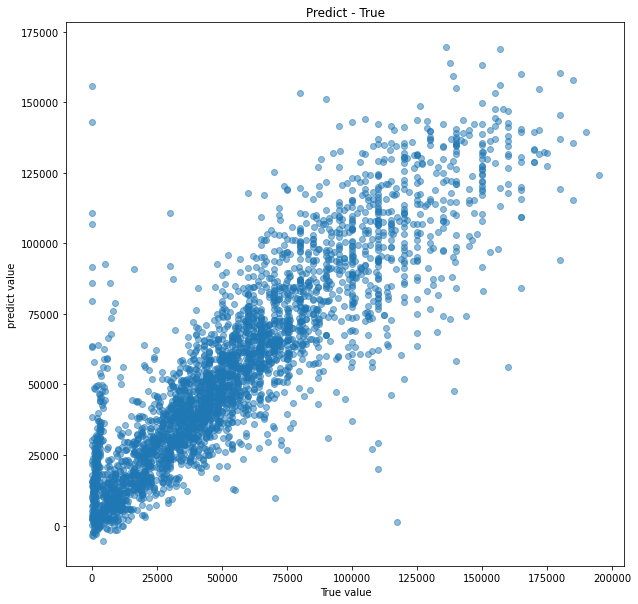

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(y_test, y_pred_tuned,'o',alpha=0.5)
plt.title("Predict - True")
plt.ylabel("predict value")
plt.xlabel("True value")
plt.show()

In [139]:

#shap_values = explainer.shap_values(X)

In [140]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [141]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

## find factors related to salary
Next, we will identify the factors that influence Shap, which is one of the explainable AIs using game theory.
Red represents the impact on the prediction value when the variable is high (plus or minus is represented by the plot on the horizontal axis. Blue represents the impact on the prediction (plus or minus) when the variable is low. 

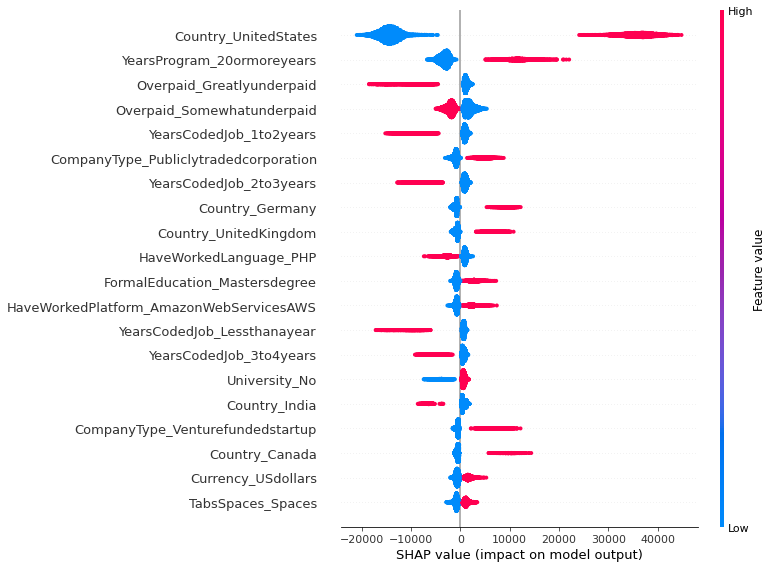

In [142]:
shap.summary_plot(shap_values, X)

- In the United States, the forecast value is quite positive, and the range is wide (it shows that the range of salary is also large).
  This is influenced by the high-priced areas of Silicon Valley.
- In addition, a wealth of engineers over 20 years have contributed to the positive forecast.
On the contrary, it can be seen that the predicted value is swinging negative for young engineers who have little experience for 1 to 3 years.
- In addition, European engineers and engineers with a master degree have a positive forecast.
- In addition, being a venture company is also a positive forecast value.

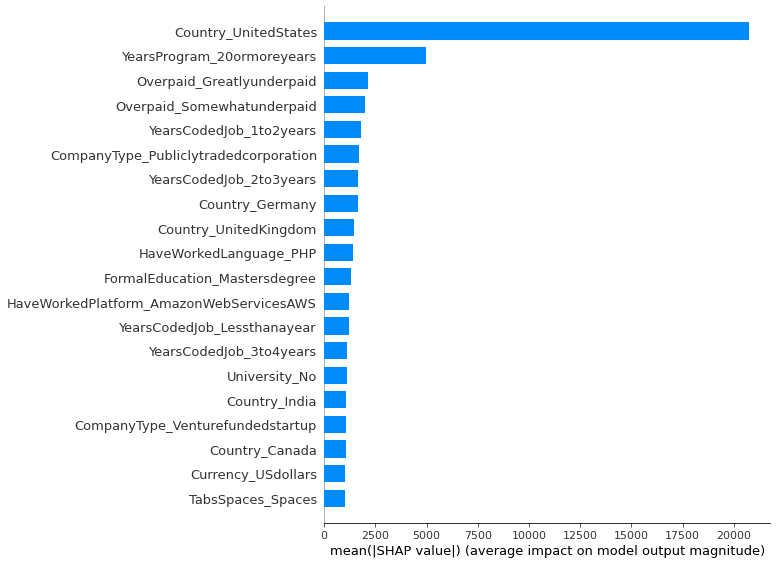

In [143]:
shap.summary_plot(shap_values, X, plot_type="bar")

It is also possible to provide information similar to Tree-based Featue Impottance.
With this information, you can see the degree of impact, but you can not confirm how much each variable will have a positive effect or a negative effect, which is the advantage of SHAP.